In [2]:
%matplotlib inline # run this cell in order to have your plots in the notebook; otherwise use plt.show() to see each plot

UsageError: unrecognized arguments: # run this cell in order to have your plots in the notebook; otherwise use plt.show() to see each plot


## Exploratory spatial data analyis with *pandas*

#### Exploratory data analysis
 is the first stage in a data science study, after data collection. The goal of this stage is to get insight into a dataset, explore the underlining stucture and patterns in the data as well as to identify outliers, missing vales, normalize or transform data. 
Main tools involved in this processare summary statics and graphics.

In this exercise you will:
- performe basic statistics on pandas dataframe
- experiment different plotting options
- deal with coordinates systems and projections in python by using functionality from cartopy library
- practice with time data 
- perform agregation operations on pandas GroupBy objects
- practice for loops, list comprehensions, boolean masking, and dataframe manipulation



For this exercise we will use a subset of one of the datasets realised by [LifeWatch INBO project](https://inbo.carto.com/u/lifewatch/datasets).


#### Task 01: Import the necesary python libraries
To solve this exercise, please, import following python libraries: pandas, numpy, matplotlib.pyplot
 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



#### Task 02: Reading the data and getting a first ideea about the dataset
- Read the file GPS_tracking.csv in a pandas DataFrame (DF). *Hint: pandas.read_csv()* . (don't forget that you imported pandas using a shorer name - alias)

Make sure the .csv file is located in your working directory or provide the full path to the data.
- Get basic information about the data using pandas *.info(),.head()* and *.tail()* methods.

In [4]:
birddata = pd.read_csv('/Users/takayuki/Document/TUB/Geospatil_Analysis/lab 2 - EDA with pandas/GPS_tracking.csv')

In [5]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 8 columns):
altitude              61920 non-null int64
date_time             61920 non-null object
device_info_serial    61920 non-null int64
direction             61477 non-null float64
latitude              61920 non-null float64
longitude             61920 non-null float64
speed_2d              61477 non-null float64
bird_name             61920 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 3.8+ MB


In [ ]:
# one line of code

In [ ]:
# one line of code

In [6]:
birddata.bird_name[:10]

0    Eric
1    Eric
2    Eric
3    Eric
4    Eric
5    Eric
6    Eric
7    Eric
8    Eric
9    Eric
Name: bird_name, dtype: object

In [7]:
# another way
birddata["bird_name"][:5]

0    Eric
1    Eric
2    Eric
3    Eric
4    Eric
Name: bird_name, dtype: object

#### Task 03: Extracting the unique values in a column


Extract the names of the birds whose trajectories are recorded in the dataset. Hint: pandas.unique ? on the column containing the birds ' names

In [8]:
bird_names = birddata['bird_name'].unique()
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

#### Task 03: Basic plotting with *matplotlib*

We will start by plotting the latitude and longitude of a flight trajectory for a single bird (of your choice) in a standard two dimensional plot. In order to accomplish this task you will:

 - extract the indices in the DF corresponding to the chosen bird_name in a variable idx
 - extract the X and Y-coordinates (as a tuple) of the flight trajectories ( Xs correspond to the values stored in  longitude column, ys corresponds to the values stored in  latitude column) from longitude and latitude columns using the boolean array previously stored *idx* variable 
 
 - plot the trajectory of the chosen bird as a line unsing the plt.plot. The default colour is blue; please experiment with changing the color. Use '.' as marker type. Change also the value of the linewidth parameter.
 


In [9]:
idx = birddata['bird_name'] == 'Eric'
idx

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
61890    False
61891    False
61892    False
61893    False
61894    False
61895    False
61896    False
61897    False
61898    False
61899    False
61900    False
61901    False
61902    False
61903    False
61904    False
61905    False
61906    False
61907    False
61908    False
61909    False
61910    False
61911    False
61912    False
61913    False
61914    False
61915    False
61916    False
61917    False
61918    False
61919    False
Name: bird_name, Length: 61920, dtype: bool

In [12]:
X, Y = birddata.longitude[idx],birddata.latitude[idx]
X

0        2.120733
1        2.120746
2        2.120885
3        2.120859
4        2.120887
5        2.120840
6        2.120901
7        2.120809
8        2.120860
9        2.121301
10       2.120850
11       2.121236
12       2.121362
13       2.152945
14       2.152989
15       2.153052
16       2.153097
17       2.152993
18       2.153009
19       2.162817
20       2.193876
21       2.194880
22       2.194862
23       2.194836
24       2.194866
25       2.234223
26       2.247980
27       2.224581
28       2.252524
29       2.252949
           ...   
19765    3.388995
19766    3.413596
19767    3.354105
19768    3.355686
19769    3.309810
19770    3.345546
19771    3.358302
19772    3.359888
19773    3.359905
19774    3.339680
19775    3.276436
19776    3.367717
19777    3.395449
19778    3.425730
19779    3.427635
19780    3.431588
19781    3.431753
19782    3.427535
19783    3.406217
19784    3.301086
19785    3.216247
19786    3.216455
19787    3.216570
19788    3.216395
19789    3

The code in the following cell creates a figure object of size (7,7)  which will serve as a container for your plot.

In [13]:
plt.figure(figsize =(7,7));

<Figure size 504x504 with 0 Axes>

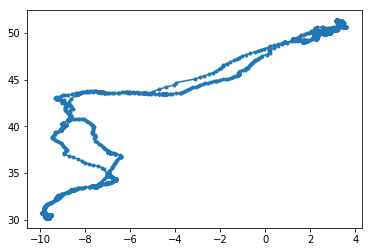

In [14]:
# _ is a dummy variable which we don't have interest
_ = plt.plot(X,Y, marker = '.')

What do you think about plotting the trajectory using this method? What did we neglected by plotting the recorded positions as points in a cartesian system of coordinates?

##### Task 03 b: plotting the trajectories of all birds in a sigle plot

The task is similar to the previous one, but you have to loop over all three birds:
- loop over the list bird_names. Hint: use a 'for' loop and the operator 'in'
- within the loop solve for the tasks you accomplished at 3a.
> - extract the indices in the DF corresponding to a bird (represented by your looping valiable) in a variable idx 
> - extract the X and Y-coordinates (as a tuple of cartesian coordinates) of the flight trajectories 
> - to identify the trajectory corresponding to a particular bird in your plot you can label the different plots (Hint: assign to the label argument of the plot the value 'bird_name' aka the looping var
- add  x and y axis labels Hint: plt.xlabel()
- add a legend Hint: plt.legend(loc = ' ') possible values for loc = : 'best', 'lower right', 'upper left', 'right', etc-
- save your figure using plt.figure('a_name.pdf')




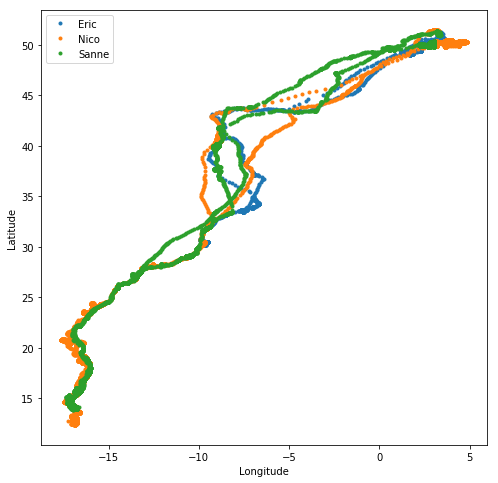

In [15]:

# create a figure object with size (8,8)
plt.figure(figsize = (8,8))
for name in bird_names:
    ix = birddata['bird_name'] == name # bool data. Iterate eric, nico, sanne. 
    x, y = birddata.longitude[ix], birddata.latitude[ix] # store data only true
    plt.plot(x,y,'.',label = name)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
plt.legend(loc = 'best')
plt.savefig('birds_trajectories.pdf')

# plot legend


# save figure
    
    

#### Task 04: Examining the speed 2D

The data also contain estimates of two dimensional speeds of the birds.
- extract the speed data for a chosen bird in a similar way as you did at task 04.
- plot a histogram for the seed data corresponding to the chosen bird unsing the method plt.hist() with the speed data and the default parameters
- check the parameters of .hist() method


/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <a list of 10 Patch objects>)

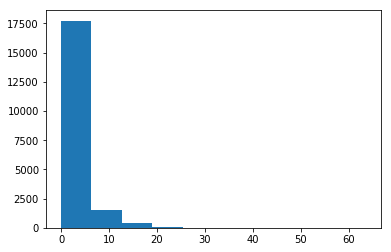

In [16]:
ix = birddata['bird_name'] == 'Eric'
speed = birddata.speed_2d[ix]
# plot the histogram of the data stored in the speed variable with the default parameters
plt.hist(speed)
# one line of code

##### Task 04 -b: Identifying the cause of error

(array([3., 1., 0., 0., 1., 2., 2., 0., 0., 1.]),
 array([0.15      , 0.59422108, 1.03844216, 1.48266324, 1.92688432,
        2.3711054 , 2.81532648, 3.25954756, 3.70376864, 4.14798972,
        4.5922108 ]),
 <a list of 10 Patch objects>)

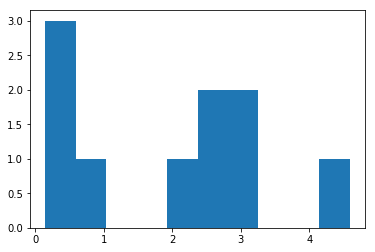

In [17]:
# plot the histogram of only the first 10 data points stored in the speed variable with the default parameters
plt.hist(speed[:10])
# one line of code

Since we get a histogram when plotting only the first 10 data points, it is reasonable to think that our data contains some invalid values. That's why, we have to check what data is contained in our array.
-  Check if the 'speed' array contains non-number objects.For this you can use NumPy function *isnan* which takes as input an array and returns a boolean value

In [18]:
# check if there is NaN(Not a Number) value
np.isnan(speed)

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
19765    False
19766    False
19767    False
19768    False
19769    False
19770    False
19771     True
19772    False
19773    False
19774    False
19775    False
19776    False
19777    False
19778     True
19779    False
19780    False
19781    False
19782    False
19783    False
19784    False
19785    False
19786    False
19787    False
19788    False
19789    False
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

- For a more concise answer, take the previous line of code and use the *np.any()* method to ask if any of the output is equal to true.
- A related method is *np.all()*. Please anticipate the output of applying the two methods on the previous line before running the code.
- Find out how many NaNs we exactly have in our speed array. Hint: np.sum() used with a boolean array convers True to 1 and False to 0

In [19]:
print(np.any(np.isnan(speed)))
print(np.all(np.isnan(speed)))

True
False


In [20]:
# compute the nr of NaNs in our 'speed' array
nr_nans = np.sum(np.isnan(speed))
print(nr_nans)

85


After detecting the missing values in our data, we want to include as input to out histogram plot only those observations that are actually numeric. For this we have to apply the following steps:
- find the NaNs in the 'speed' array and assign the output to a variable ind 
- check the type of the values in'ind' (you can print the vector)
- plot the bitwise complement of the ind array using the operator ' ~ ' (turns each occurrence of true to a false and vice versa); Also,
> -  a histogram is informative when the bin width fits to the data. Change the value of the *bins* argument in order to best describe your data; Hint: you can use np.linspace(start_val, end_val, nr_values) to generate the borders of the bins; you can start with np.linspace(0,30,20) and try to find those values for the bins widths that best reflect the data distribution
> -  add meaningful axes labels. Hint: the Y axis is the 'Frequency'
> -  normalize the histogram



In [21]:
# '~' makes the value opposite
ind_n = ~np.isnan(speed) 
print(ind_n)

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
19765     True
19766     True
19767     True
19768     True
19769     True
19770     True
19771    False
19772     True
19773     True
19774     True
19775     True
19776     True
19777     True
19778    False
19779     True
19780     True
19781     True
19782     True
19783     True
19784     True
19785     True
19786     True
19787     True
19788     True
19789     True
19790     True
19791     True
19792     True
19793     True
19794     True
Name: speed_2d, Length: 19795, dtype: bool


(array([4.405e+03, 2.982e+03, 1.987e+03, 1.482e+03, 1.204e+03, 1.070e+03,
        8.590e+02, 7.020e+02, 4.930e+02, 4.580e+02, 3.400e+02, 2.560e+02,
        2.400e+02, 2.300e+02, 1.970e+02, 1.690e+02, 1.410e+02, 1.460e+02,
        1.240e+02, 1.340e+02, 1.160e+02, 1.030e+02, 1.040e+02, 1.060e+02,
        1.170e+02, 7.900e+01, 8.900e+01, 8.700e+01, 6.900e+01, 7.100e+01,
        8.900e+01, 6.500e+01, 7.100e+01, 6.600e+01, 6.100e+01, 4.900e+01,
        4.500e+01, 5.500e+01, 6.000e+01, 5.100e+01, 3.500e+01, 3.100e+01,
        2.900e+01, 2.900e+01, 2.200e+01, 2.900e+01, 2.700e+01, 2.900e+01,
        2.100e+01, 2.400e+01, 1.400e+01, 1.400e+01, 1.200e+01, 1.300e+01,
        1.400e+01, 1.100e+01, 1.600e+01, 1.500e+01, 1.100e+01, 1.500e+01,
        5.000e+00, 1.000e+01, 6.000e+00, 7.000e+00, 3.000e+00, 9.000e+00,
        3.000e+00, 4.000e+00, 4.000e+00, 3.000e+00, 7.000e+00, 7.000e+00,
        2.000e+00, 3.000e+00, 5.000e+00, 0.000e+00, 4.000e+00, 3.000e+00,
        1.000e+00, 3.000e+00, 1.000e+0

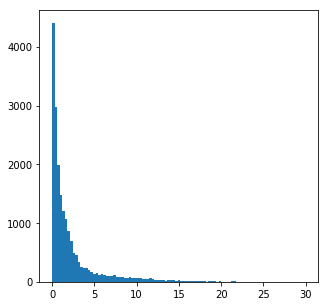

In [22]:
plt.figure(figsize = (5,5));
plt.hist(speed[ind_n], bins = np.linspace(0,30,100))


#### Task 05: Plotting with pandas

Pandas provides plotting functionality as well (wrapers to plt methods). Although less customizable than PLT plots, they solve some data issues such as dealing with NaNs.
However always examine your data carefully and look for the presence of NaNs before preparing your plots!!

**Pandas plotting functions are methods of data frame instances!.** ex: ...df.plot(kind = 'scatter', ...).
You can plot a different figure by changing the value of the 'kind' argument of pandas plot function.

- Use the introspection method to get a better understanding of ploting in pandas
- plot a histogram of the speed_2d data providing  range = [0,30] as argument. Which is the role of 'range' argument? Can you find better values for range argument?
- label x axis






Text(0.5, 0, '2D speed')

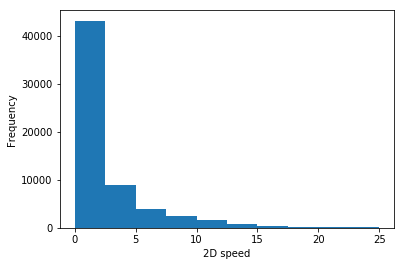

In [36]:
birddata.speed_2d.plot(kind = 'hist', range = {0, 25})
plt.xlabel('2D speed')
# output -> many 0 values


What impression do you get, from the shape of the histogram, about the distribution of speed data? 

Is it not similar with a histogram which you would possibly obtain if we would bin the salaries ... no matter where from?

# Short intro to Cartopy

Cartopy is a library (one of several main libraries) that provides cartographic tools for python. It provides an interface  for creating maps using matplotlib by providing a value for the *projection* argument. For learning more about cartopy please refer to the [official documentation](https://scitools.org.uk/cartopy/docs/latest/).

 [*cartopy.crs.CRS*](https://scitools.org.uk/cartopy/docs/latest/crs/index.html) class is the very core of cartopy, and the parent class for all coordinate reference systems in cartopy.
 
 [* GeoAxes*](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.add_feature) is another important class that provides integration of geographical information with Matplotlib. It adds extra functionality to  *axes* class from matplotlib, which is specific to drawing maps.
 
The method **.add_feature()** of an **axes** object, allows, among others, to add to a plot/map some pre-defined Features that exist as cartopy.feature constants such as: BORDERS, COASTLINE, LAKES, LAND, OCEAN, RIVERS, STATES 

The maped area defined by the **.set_extent()** method of an **axes** object

#### Task 06: Using Cartopy to plot data with cartographic projection

I) setting up the figure
1.  import the cartopy module and cartopy.crs class as ccrs - cartopy class that implements coordinate reference systems
2.  import the class cartopy.feature as cfeature
3.  create a projection object project and specify Mercator projection     (projection is a method of a ccrs object)
4.  create a figure object using matplotlib of size (10, 10)
5.  instantiate a axes object (using plt) and pass as argument the projection object you created at c)
6.  set the extend of your figure (-25.0, 20.0, 52.0, 10.0) # this is a tuple suitable coordinates that were found by trial and error
7. using the .add_feature() method on your axes objectand some geographic features to your map

II) ploting the trajectories of the birds (your code will be very similar to the code you have written at Task 03 b)

- loop over all of our bird names
> - extract the rows from our data frame to correspond to that particular bird
> - extract the longitude and latitude in variables x and y
> - provide to the plot method the aditional argument: *transform = ccrs.Geodetic()*
- add also a legend to your plot
 





In [37]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# I have to install cortopy on my mac

In [ ]:
import cartopy

we need to specify a specific projection that we're interested in using.

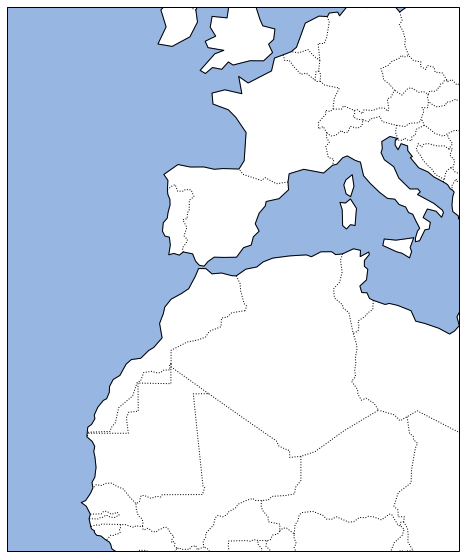

In [56]:
# define mercator as projection
proj= ccrs.Mercator()

plt.figure(figsize = (10,10))

ax = plt.axes(projection = proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))

ax.add_feature(cfeature.BORDERS, linestyle =':')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.LAND)
# one line of code

In [64]:
for name in bird_names:
    ix = birddata['bird_name'] == name
    x,y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x,y,'.',transform = ccrs.Geodetic(), label = name)
    
#  ------------- errorr ------------   
plt.ax.legend(loc = 'best')
plt.ax.savefig('map.pdf')
plt.ax.show()   

# ----------------------------------

# plt.figure(figsize = (8,8))
# for name in bird_names:
#     ix = birddata['bird_name'] == name # bool data. Iterate eric, nico, sanne. 
#     x, y = birddata.longitude[ix], birddata.latitude[ix] # store data only true
#     plt.plot(x,y,'.',label = name)
#     plt.xlabel('Longitude')
#     plt.ylabel('Latitude')
# plt.legend(loc = 'best')
# plt.savefig('birds_trajectories.pdf')

AttributeError: module 'matplotlib.pyplot' has no attribute 'ax'

#### Task 06: Dealing with timestamps and operations with timestamps

- import *datetime* -  a python library that is is made for dealing with these types of data.
- to operate on the time and date stamps, such as finding out how much time has elapsed between any two timestamps, we first need to convert them into so-called *daytime object*, that
supports our arithmetic operations.
- to become more familiar with the datetimelibrary, we call the function *today* from the module 'datetime'. It returns to us a datetime, datetime object, that consists of the current date and timestamp.
- get the time elapsed between t1 and t2 by applying the arithmetic operation. The output is what's called a *time delta* object .


- our dataframe contains a column 'date_time'. Look at a couple of entries in this column and check their type
- assignt to a variable **date_string** the first entry in the 'date_time' column

- convert the time observation (timestamps) **date_string** given as strings in **datetime object**
 


In [65]:
# one line of code
import datetime

In [66]:
t1 = datetime.datetime.today()
t1

datetime.datetime(2019, 4, 18, 12, 3, 2, 822666)

In [67]:
t2 = datetime.datetime.today()
t2

datetime.datetime(2019, 4, 18, 12, 3, 24, 718182)

In [69]:
# one line of code
time_diff = t2 - t1
time_diff

datetime.timedelta(seconds=21, microseconds=895516)

In [106]:
# our dataframe contains a column 'date_time'. Look at a couple of entries in this column and check their type
# one line of code
birddata.loc[0:10, 'date_time']
type(birddata.loc[0:10, 'date_time'])

pandas.core.series.Series

In [107]:
# assignt to a variable date_string the first entry in the 'date_time' column
date_string= birddata.loc[0,'date_time']
type(date_string)
date_string

'2013-08-15 00:18:08+00'

In [108]:
# the field following second is UTC is an offset that is expressed in hours
#and here is always 0, that 's why we can ignore it
date_string[:-3]

'2013-08-15 00:18:08'

To compute how much time has passed between any two observations in our data set, we first have to **convert the timestamps, now given as strings, to datetime objects**.

Next we're going to use **strip time function** to turn a string to a datetime object.

- the first argument is the string, which we would like to turn into a datetime object.
- the second argument is also a string, but in this case the latter string **specifies the *formatting* to be applied to the first string.**


In [109]:
# convert the time observation (timestamps) date_string given as strings in datetime object

datetime.datetime.strptime(date_string[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

You can now use this function to go over each row in our data set, and create a new datetime object corresponding to every single row. You can follow the following steps:
- set up an empty list, called e.g. timestamps
- loop over every single row in birds data set
> - for every single row, extract the date time, ignoring the last three characters.
> - append the resulting object to the timestamps list.


In [119]:
timestamps =[]
for k in range(len(birddata)):
    # append to the timestamp list the converted time object (practically apply to each row the cell code provided in the previous code cell) 
    # you have only to meaningfully combine the code in the previous three cells, for the looping var k
    
    # extract date time 
    foo = birddata.loc[k,'date_time']
    
    # cut off the last three elements of date time
    hoge = datetime.datetime.strptime(foo[:-3], "%Y-%m-%d %H:%M:%S")
    
    # add to timestamps list
    timestamps.append(hoge)

timestamps
    

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58),
 datetime.datetime(2013, 8, 15, 1, 47, 51),
 datetime.datetime(2013, 8, 15, 2, 17, 42),
 datetime.datetime(2013, 8, 15, 2, 47, 38),
 datetime.datetime(2013, 8, 15, 3, 2, 33),
 datetime.datetime(2013, 8, 15, 3, 17, 27),
 datetime.datetime(2013, 8, 15, 3, 32, 35),
 datetime.datetime(2013, 8, 15, 3, 47, 48),
 datetime.datetime(2013, 8, 15, 4, 3, 39),
 datetime.datetime(2013, 8, 15, 4, 18, 40),
 datetime.datetime(2013, 8, 15, 4, 33, 53),
 datetime.datetime(2013, 8, 15, 4, 49, 6),
 datetime.datetime(2013, 8, 15, 5, 4, 45),
 datetime.datetime(2013, 8, 15, 5, 20, 9),
 datetime.datetime(2013, 8, 15, 5, 35, 4),
 datetime.datetime(2013, 8, 15, 5, 49, 58),
 datetime.datetime(2013, 8, 15, 6, 4, 56),
 datetime.datetime(2013, 8, 15, 6, 19, 54),
 datetime.datetime(2013, 8, 15, 6, 34, 50),
 datetime.datetime(2013, 8, 15, 6, 49, 43),
 datetime.datetime(2013, 8, 15, 7, 4, 40)

In [120]:
# checking the first 5 timestamps
timestamps[:5]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58),
 datetime.datetime(2013, 8, 15, 1, 47, 51),
 datetime.datetime(2013, 8, 15, 2, 17, 42)]

- construct a panda series object and insert the timestamp from my Python list into that object (left side)
- append the panda series as a new column in my bird data data frame (right side)

Hint: pd.Series(data, index = ), use the index from birddata dataframe

In [126]:
# birddata['timestamp'] = pd.Series(timestamps)
birddata['timestamp'] = pd.Series(timestamps )
birddata

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42
5,54,2013-08-15 02:47:38+00,851,-46.344478,49.420375,2.120840,2.904772,Eric,2013-08-15 02:47:38
6,57,2013-08-15 03:02:33+00,851,-56.369922,49.420352,2.120901,3.080584,Eric,2013-08-15 03:02:33
7,65,2013-08-15 03:17:27+00,851,-79.170227,49.420342,2.120809,2.199659,Eric,2013-08-15 03:17:27
8,59,2013-08-15 03:32:35+00,851,-57.682428,49.420319,2.120860,2.640076,Eric,2013-08-15 03:32:35
9,107,2013-08-15 03:47:48+00,851,119.604739,49.420286,2.121301,4.592211,Eric,2013-08-15 03:47:48


In [127]:
# check the new dataframe
birddata.head(2)

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.15000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.43836,Eric,2013-08-15 00:48:07


In [129]:
# doing arithmetic with timestamps
birddata.timestamp[4]-birddata.timestamp[3]

Timedelta('0 days 00:29:51')

Create a list that captures the amount of time that has elapsed since the beginning of data collection:
- first, extract the timestamps for Eric, in an object called 'times'
- create the elapsed time object as a list comprehension.



In [176]:
times = birddata.timestamp[birddata.bird_name== 'Eric']
elapsed_time = [None] # the list will contain the results of the different timestamps - the initial timestamp
for k in range(len(times)):
    foo = times[k] - times[0]
    elapsed_time.append(foo)

elapsed_time

[None,
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:29:59'),
 Timedelta('0 days 00:59:50'),
 Timedelta('0 days 01:29:43'),
 Timedelta('0 days 01:59:34'),
 Timedelta('0 days 02:29:30'),
 Timedelta('0 days 02:44:25'),
 Timedelta('0 days 02:59:19'),
 Timedelta('0 days 03:14:27'),
 Timedelta('0 days 03:29:40'),
 Timedelta('0 days 03:45:31'),
 Timedelta('0 days 04:00:32'),
 Timedelta('0 days 04:15:45'),
 Timedelta('0 days 04:30:58'),
 Timedelta('0 days 04:46:37'),
 Timedelta('0 days 05:02:01'),
 Timedelta('0 days 05:16:56'),
 Timedelta('0 days 05:31:50'),
 Timedelta('0 days 05:46:48'),
 Timedelta('0 days 06:01:46'),
 Timedelta('0 days 06:16:42'),
 Timedelta('0 days 06:31:35'),
 Timedelta('0 days 06:46:32'),
 Timedelta('0 days 07:01:27'),
 Timedelta('0 days 07:16:23'),
 Timedelta('0 days 07:31:21'),
 Timedelta('0 days 07:46:48'),
 Timedelta('0 days 08:01:44'),
 Timedelta('0 days 08:16:39'),
 Timedelta('0 days 08:31:43'),
 Timedelta('0 days 08:46:55'),
 Timedelta('0 days 09:01:59'),
 

In [177]:
elapsed_time[0]

In [178]:
elapsed_time[1000]

Timedelta('12 days 01:31:42')


##### Compute the number of elapsed days 
- to measure time in certain units, like hours or days take a given time object and divide by a time delta object.
> - create a time delta object that's equal to 1 day
> - do the division


In [188]:
day_unit =datetime.timedelta(days= 1)
type(day_unit)
type(elapsed_time[1])

pandas._libs.tslibs.timedeltas.Timedelta

In [180]:
days = elapsed_time[1000]/day_unit

In [185]:
type(days)

float

In [194]:
# compute the number of elapsed days for the whole dataset; convert elapsed time to a np.array() to be able to make the division

all_bird_times = birddata['timestamp']
elapsed_time = [None] # the list will contain the results of the different timestamps - the initial timestamp
elapsed_days = [None]
for k in range(len(all_bird_times)):
    foo = all_bird_times[k] - all_bird_times[0]
    elapsed_time.append(foo) # list with time
    print(elapsed_time[k])
#     hoge = elapsed_time[k] /day_unit
#     elapsed_a = np.array(elapsed_time) # convert list into array
#     days = foo2[k]/day_unit
#     days = elapsed_time[k] / day_unit


# elapsed_days
# elapsed_time

None
0 days 00:00:00
0 days 00:29:59
0 days 00:59:50
0 days 01:29:43
0 days 01:59:34
0 days 02:29:30
0 days 02:44:25
0 days 02:59:19
0 days 03:14:27
0 days 03:29:40
0 days 03:45:31
0 days 04:00:32
0 days 04:15:45
0 days 04:30:58
0 days 04:46:37
0 days 05:02:01
0 days 05:16:56
0 days 05:31:50
0 days 05:46:48
0 days 06:01:46
0 days 06:16:42
0 days 06:31:35
0 days 06:46:32
0 days 07:01:27
0 days 07:16:23
0 days 07:31:21
0 days 07:46:48
0 days 08:01:44
0 days 08:16:39
0 days 08:31:43
0 days 08:46:55
0 days 09:01:59
0 days 09:16:55
0 days 09:31:53
0 days 09:46:47
0 days 10:01:43
0 days 10:16:43
0 days 10:31:37
0 days 10:46:35
0 days 11:02:00
0 days 11:16:57
0 days 11:31:58
0 days 11:46:58
0 days 12:03:39
0 days 12:18:35
0 days 12:33:26
0 days 12:48:22
0 days 13:03:23
0 days 13:18:48
0 days 13:33:43
0 days 13:48:40
0 days 14:03:48
0 days 14:19:19
0 days 14:34:18
0 days 14:49:13
0 days 15:04:07
0 days 15:19:14
0 days 15:34:25
0 days 15:49:38
0 days 16:04:49
0 days 16:20:02
0 days 16:35:13
0 d

7 days 13:20:00
7 days 13:35:06
7 days 13:50:06
7 days 14:05:27
7 days 14:20:25
7 days 14:35:21
7 days 14:50:28
7 days 15:05:38
7 days 15:21:25
7 days 15:36:24
7 days 15:51:30
7 days 16:06:44
7 days 16:21:47
7 days 16:36:40
7 days 16:51:41
7 days 17:06:33
7 days 17:21:31
7 days 17:36:25
7 days 17:52:19
7 days 18:07:20
7 days 18:22:18
7 days 18:37:13
7 days 18:52:10
7 days 19:07:05
7 days 19:22:02
7 days 19:36:57
7 days 19:51:53
7 days 20:06:52
7 days 20:22:19
7 days 20:37:13
7 days 21:07:05
7 days 21:36:59
7 days 22:06:51
7 days 22:36:43
7 days 23:07:00
7 days 23:37:08
8 days 00:07:07
8 days 00:37:30
8 days 01:07:21
8 days 01:37:13
8 days 02:07:06
8 days 02:36:58
8 days 02:52:03
8 days 03:07:22
8 days 03:22:32
8 days 03:37:59
8 days 03:52:56
8 days 04:07:52
8 days 04:22:51
8 days 04:37:46
8 days 04:52:47
8 days 05:07:40
8 days 05:22:46
8 days 05:38:18
8 days 05:53:13
8 days 06:08:09
8 days 06:23:07
8 days 06:38:14
8 days 06:53:27
8 days 07:08:41
8 days 07:24:00
8 days 07:38:49
8 days 0

15 days 11:01:46
15 days 11:16:42
15 days 11:32:00
15 days 11:46:50
15 days 12:01:48
15 days 12:16:43
15 days 12:31:40
15 days 12:46:36
15 days 13:01:42
15 days 13:17:18
15 days 13:32:10
15 days 13:47:05
15 days 14:02:27
15 days 14:17:31
15 days 14:32:28
15 days 14:47:24
15 days 15:02:18
15 days 15:17:15
15 days 15:32:09
15 days 15:47:16
15 days 16:02:45
15 days 16:17:58
15 days 16:33:09
15 days 16:48:21
15 days 17:03:33
15 days 17:19:01
15 days 17:34:03
15 days 17:49:00
15 days 18:03:54
15 days 18:18:49
15 days 18:34:25
15 days 18:49:26
15 days 19:04:41
15 days 19:19:41
15 days 19:34:46
15 days 19:50:17
15 days 20:06:01
15 days 20:20:58
15 days 20:35:55
15 days 21:05:47
15 days 21:35:38
15 days 22:05:30
15 days 22:35:22
15 days 23:05:48
15 days 23:35:38
16 days 00:05:30
16 days 00:35:22
16 days 01:05:13
16 days 01:35:12
16 days 02:05:30
16 days 02:35:21
16 days 02:50:18
16 days 03:05:13
16 days 03:20:10
16 days 03:35:06
16 days 03:50:02
16 days 04:04:59
16 days 04:19:59
16 days 04:34:

23 days 19:50:13
23 days 20:05:25
23 days 20:20:30
23 days 20:35:26
23 days 21:05:48
23 days 21:35:39
23 days 22:05:31
23 days 22:35:23
23 days 23:05:20
23 days 23:35:30
24 days 00:05:32
24 days 00:35:25
24 days 01:05:16
24 days 01:35:08
24 days 02:05:30
24 days 02:35:25
24 days 02:50:20
24 days 03:05:26
24 days 03:21:01
24 days 03:35:55
24 days 03:50:55
24 days 04:05:47
24 days 04:21:27
24 days 04:36:27
24 days 04:51:24
24 days 05:06:18
24 days 05:21:20
24 days 05:36:11
24 days 05:51:08
24 days 06:06:05
24 days 06:20:59
24 days 06:36:01
24 days 06:50:54
24 days 07:05:49
24 days 07:20:47
24 days 07:36:31
24 days 07:51:25
24 days 08:06:19
24 days 08:21:15
24 days 08:36:18
24 days 08:51:26
24 days 09:06:50
24 days 09:21:58
24 days 09:38:00
24 days 09:53:01
24 days 10:07:58
24 days 10:22:52
24 days 10:38:31
24 days 10:53:31
24 days 11:08:27
24 days 11:23:38
24 days 11:39:01
24 days 11:54:31
24 days 12:09:31
24 days 12:24:30
24 days 12:39:28
24 days 12:54:51
24 days 13:09:47
24 days 13:24:

32 days 02:00:44
32 days 02:30:47
32 days 02:46:19
32 days 03:01:15
32 days 03:16:11
32 days 03:31:07
32 days 03:46:30
32 days 04:01:31
32 days 04:16:27
32 days 04:31:27
32 days 04:46:22
32 days 05:01:18
32 days 05:16:12
32 days 05:31:10
32 days 05:46:04
32 days 06:01:03
32 days 06:16:08
32 days 06:31:30
32 days 06:46:19
32 days 07:01:17
32 days 07:16:12
32 days 07:31:09
32 days 07:46:04
32 days 08:01:01
32 days 08:16:02
32 days 08:31:01
32 days 08:46:14
32 days 09:01:28
32 days 09:16:41
32 days 09:31:52
32 days 09:47:24
32 days 10:02:20
32 days 10:17:47
32 days 10:32:44
32 days 10:47:40
32 days 11:02:39
32 days 11:17:34
32 days 11:32:32
32 days 11:47:25
32 days 12:02:21
32 days 12:17:22
32 days 12:33:00
32 days 12:47:56
32 days 13:02:51
32 days 13:17:48
32 days 13:32:46
32 days 13:47:44
32 days 14:02:37
32 days 14:17:32
32 days 14:32:29
32 days 14:47:24
32 days 15:02:21
32 days 15:17:19
32 days 15:32:17
32 days 15:47:30
32 days 16:02:22
32 days 16:17:15
32 days 16:32:11
32 days 16:47:

39 days 17:48:13
39 days 18:03:08
39 days 18:18:04
39 days 18:33:01
39 days 18:47:59
39 days 19:02:58
39 days 19:17:49
39 days 19:32:45
39 days 19:48:10
39 days 20:03:08
39 days 20:18:04
39 days 20:33:02
39 days 21:03:07
39 days 21:33:12
39 days 22:03:20
39 days 22:33:48
39 days 23:03:40
39 days 23:33:32
40 days 00:03:26
40 days 00:33:18
40 days 01:03:26
40 days 01:33:31
40 days 02:04:01
40 days 02:34:06
40 days 02:49:05
40 days 03:04:00
40 days 03:18:58
40 days 03:34:22
40 days 03:49:20
40 days 04:04:13
40 days 04:19:08
40 days 04:34:08
40 days 04:49:00
40 days 05:04:01
40 days 05:18:57
40 days 05:33:59
40 days 05:50:30
40 days 06:05:32
40 days 06:20:34
40 days 06:35:37
40 days 06:50:53
40 days 07:06:14
40 days 07:21:49
40 days 07:36:44
40 days 07:51:40
40 days 08:06:37
40 days 08:22:01
40 days 08:37:23
40 days 08:52:55
40 days 09:07:58
40 days 09:22:55
40 days 09:37:49
40 days 09:53:27
40 days 10:08:28
40 days 10:23:24
40 days 10:38:26
40 days 10:53:16
40 days 11:08:14
40 days 11:23:

51 days 12:27:22
51 days 12:42:58
51 days 12:58:22
51 days 13:13:17
51 days 13:28:13
51 days 13:43:09
51 days 13:58:05
51 days 14:13:01
51 days 14:42:56
51 days 14:57:50
51 days 15:12:48
51 days 15:27:45
51 days 15:43:00
51 days 15:57:49
51 days 16:12:47
51 days 16:27:42
51 days 16:42:38
51 days 16:57:47
51 days 17:13:04
51 days 17:28:02
51 days 17:43:24
51 days 17:58:22
51 days 18:13:20
51 days 18:28:15
51 days 18:43:10
51 days 18:58:04
51 days 19:13:01
51 days 19:28:00
51 days 19:43:05
51 days 19:58:26
51 days 20:13:17
51 days 20:28:26
51 days 20:58:22
51 days 21:28:16
51 days 21:58:07
51 days 22:27:58
51 days 22:58:24
51 days 23:28:15
51 days 23:58:16
52 days 00:28:24
52 days 00:58:55
52 days 01:28:45
52 days 01:58:39
52 days 02:28:32
52 days 02:43:28
52 days 02:58:23
52 days 03:13:18
52 days 03:28:16
52 days 03:43:30
52 days 03:58:21
52 days 04:13:17
52 days 04:28:46
52 days 04:43:41
52 days 04:58:39
52 days 05:13:35
52 days 05:28:34
52 days 05:44:01
52 days 05:58:56
52 days 06:14:

59 days 06:08:01
59 days 06:22:56
59 days 06:37:52
59 days 06:52:48
59 days 07:07:41
59 days 07:23:06
59 days 07:38:15
59 days 07:54:30
59 days 08:09:33
59 days 08:24:30
59 days 08:39:27
59 days 08:54:21
59 days 09:09:18
59 days 09:24:19
59 days 09:39:12
59 days 09:54:30
59 days 10:09:33
59 days 10:24:30
59 days 10:39:27
59 days 10:54:25
59 days 11:10:01
59 days 11:25:03
59 days 11:40:08
59 days 11:55:21
59 days 12:10:35
59 days 12:25:34
59 days 12:40:29
59 days 12:55:26
59 days 13:10:24
59 days 13:26:11
59 days 13:41:30
59 days 13:56:29
59 days 14:11:26
59 days 14:26:54
59 days 14:43:01
59 days 14:58:08
59 days 15:13:02
59 days 15:27:58
59 days 15:42:53
59 days 15:57:52
59 days 16:12:45
59 days 16:27:41
59 days 16:42:44
59 days 16:57:52
59 days 17:13:16
59 days 17:28:31
59 days 17:44:00
59 days 17:58:54
59 days 18:13:49
59 days 18:28:45
59 days 18:43:42
59 days 18:58:37
59 days 19:13:44
59 days 19:28:56
59 days 19:44:30
59 days 19:59:37
59 days 20:14:48
59 days 20:30:01
59 days 21:00:

66 days 09:31:59
66 days 09:46:56
66 days 10:01:49
66 days 10:16:47
66 days 10:32:57
66 days 10:47:58
66 days 11:02:56
66 days 11:17:53
66 days 11:32:46
66 days 11:47:43
66 days 12:02:39
66 days 12:17:35
66 days 12:32:33
66 days 12:48:00
66 days 13:02:53
66 days 13:17:49
66 days 13:32:45
66 days 13:47:41
66 days 14:02:39
66 days 14:17:35
66 days 14:32:30
66 days 14:47:39
66 days 15:03:07
66 days 15:18:41
66 days 15:33:38
66 days 15:49:01
66 days 16:03:59
66 days 16:18:56
66 days 16:33:52
66 days 16:48:51
66 days 17:03:54
66 days 17:19:05
66 days 17:34:17
66 days 17:50:00
66 days 18:05:01
66 days 18:19:58
66 days 18:34:55
66 days 18:50:01
66 days 19:05:06
66 days 19:20:30
66 days 19:35:29
66 days 19:50:21
66 days 20:05:19
66 days 20:20:13
66 days 20:35:09
66 days 21:05:04
66 days 21:34:54
66 days 22:05:18
66 days 22:35:10
66 days 23:05:03
66 days 23:34:57
67 days 00:04:57
67 days 00:35:25
67 days 01:05:19
67 days 01:35:10
67 days 02:05:03
67 days 02:34:54
67 days 02:49:50
67 days 03:04:

78 days 08:09:03
78 days 08:24:01
78 days 08:38:58
78 days 08:53:53
78 days 09:09:21
78 days 09:24:29
78 days 09:39:41
78 days 09:55:51
78 days 10:10:46
78 days 10:25:39
78 days 10:40:32
78 days 10:55:29
78 days 11:10:36
78 days 11:25:37
78 days 11:40:32
78 days 11:55:40
78 days 12:10:55
78 days 12:25:53
78 days 12:40:58
78 days 12:56:31
78 days 13:11:38
78 days 13:26:40
78 days 13:41:40
78 days 13:56:42
78 days 14:11:58
78 days 14:28:23
78 days 14:43:12
78 days 14:58:11
78 days 15:13:07
78 days 15:28:02
78 days 15:42:56
78 days 15:58:24
78 days 16:13:22
78 days 16:28:16
78 days 16:43:13
78 days 16:58:07
78 days 17:13:03
78 days 17:28:00
78 days 17:43:06
78 days 17:58:30
78 days 18:13:21
78 days 18:28:15
78 days 18:43:13
78 days 18:58:07
78 days 19:13:04
78 days 19:28:00
78 days 19:42:55
78 days 19:57:51
78 days 20:12:48
78 days 20:27:46
78 days 20:42:45
78 days 21:13:00
78 days 21:43:06
78 days 22:13:31
78 days 22:43:28
78 days 23:13:20
78 days 23:43:40
79 days 00:13:47
79 days 00:43:

90 days 07:36:18
90 days 07:51:16
90 days 08:06:29
90 days 08:21:23
90 days 08:36:21
90 days 08:52:01
90 days 09:06:59
90 days 09:21:54
90 days 09:36:50
90 days 09:51:50
90 days 10:06:47
90 days 10:21:49
90 days 10:36:51
90 days 10:51:47
90 days 11:06:45
90 days 11:21:48
90 days 11:37:10
90 days 11:52:40
90 days 12:07:41
90 days 12:22:54
90 days 12:38:10
90 days 12:53:17
90 days 13:08:32
90 days 13:23:48
90 days 13:39:25
90 days 13:54:26
90 days 14:09:22
90 days 14:24:18
90 days 14:39:15
90 days 14:54:10
90 days 15:09:07
90 days 15:24:04
90 days 15:39:01
90 days 15:56:30
90 days 16:12:00
90 days 16:27:01
90 days 16:41:55
90 days 16:56:52
90 days 17:11:47
90 days 17:26:44
90 days 17:41:40
90 days 17:57:00
90 days 18:12:01
90 days 18:27:00
90 days 18:41:56
90 days 18:56:53
90 days 19:11:48
90 days 19:26:43
90 days 19:41:40
90 days 19:56:36
90 days 20:11:31
90 days 20:26:27
90 days 20:41:25
90 days 21:11:48
90 days 21:41:57
90 days 22:12:15
90 days 22:42:22
90 days 23:12:52
90 days 23:42:

97 days 23:31:03
98 days 00:01:24
98 days 00:31:15
98 days 01:01:08
98 days 01:31:04
98 days 02:01:03
98 days 02:31:31
98 days 02:46:27
98 days 03:01:23
98 days 03:16:19
98 days 03:31:15
98 days 03:46:11
98 days 04:01:07
98 days 04:16:03
98 days 04:31:01
98 days 04:45:57
98 days 05:01:02
98 days 05:16:13
98 days 05:31:25
98 days 05:47:00
98 days 06:01:55
98 days 06:16:52
98 days 06:31:47
98 days 06:46:43
98 days 07:01:40
98 days 07:16:35
98 days 07:31:46
98 days 07:47:31
98 days 08:02:27
98 days 08:17:25
98 days 08:32:20
98 days 08:47:16
98 days 09:02:11
98 days 09:32:03
98 days 09:47:01
98 days 10:01:57
98 days 10:16:53
98 days 10:32:08
98 days 10:47:06
98 days 11:02:08
98 days 11:17:33
98 days 11:32:39
98 days 11:47:48
98 days 12:02:57
98 days 12:18:07
98 days 12:33:10
98 days 12:48:09
98 days 13:03:31
98 days 13:18:29
98 days 13:33:24
98 days 13:48:23
98 days 14:03:17
98 days 14:18:12
98 days 14:33:11
98 days 14:48:27
98 days 15:03:16
98 days 15:18:11
98 days 15:33:07
98 days 15:48:

104 days 12:45:26
104 days 13:00:21
104 days 13:15:18
104 days 13:30:15
104 days 13:45:09
104 days 14:00:06
104 days 14:15:09
104 days 14:30:15
104 days 15:00:17
104 days 15:15:37
104 days 15:30:45
104 days 15:46:00
104 days 16:00:58
104 days 16:16:05
104 days 16:31:57
104 days 16:47:14
104 days 17:02:24
104 days 17:17:27
104 days 17:32:21
104 days 17:47:31
104 days 18:02:32
104 days 18:17:31
104 days 18:32:39
104 days 18:48:01
104 days 19:03:01
104 days 19:17:57
104 days 19:32:53
104 days 19:47:49
104 days 20:02:45
104 days 20:17:41
104 days 20:32:39
104 days 21:02:30
104 days 21:32:55
104 days 22:02:45
104 days 22:32:37
104 days 23:02:30
104 days 23:32:32
105 days 00:03:00
105 days 00:33:25
105 days 01:03:18
105 days 01:33:10
105 days 02:03:14
105 days 02:33:31
105 days 02:48:49
105 days 03:04:00
105 days 03:19:02
105 days 03:33:59
105 days 03:49:04
105 days 04:04:18
105 days 04:19:48
105 days 04:34:48
105 days 04:49:41
105 days 05:04:41
105 days 05:19:33
105 days 05:34:32
105 days 0

113 days 16:00:58
113 days 16:15:53
113 days 16:30:51
113 days 16:46:01
113 days 17:01:06
113 days 17:16:17
113 days 17:31:31
113 days 17:47:00
113 days 18:01:59
113 days 18:16:56
113 days 18:31:55
113 days 18:46:47
113 days 19:01:43
113 days 19:16:39
113 days 19:31:36
113 days 19:46:33
113 days 20:01:29
113 days 20:16:25
113 days 20:31:21
113 days 21:01:30
113 days 21:31:54
113 days 22:01:44
113 days 22:31:37
113 days 23:01:27
113 days 23:31:20
114 days 00:01:48
114 days 00:31:36
114 days 01:01:29
114 days 01:31:23
114 days 02:01:14
114 days 02:31:30
114 days 02:46:31
114 days 03:01:27
114 days 03:16:25
114 days 03:31:30
114 days 03:46:43
114 days 04:01:43
114 days 04:16:40
114 days 04:32:01
114 days 04:47:04
114 days 05:02:12
114 days 05:17:55
114 days 05:32:55
114 days 05:47:52
114 days 06:02:49
114 days 06:17:55
114 days 06:33:06
114 days 06:48:07
114 days 07:03:24
114 days 07:18:18
114 days 07:33:17
114 days 07:48:55
114 days 08:03:54
114 days 08:18:47
114 days 08:33:43
114 days 0

125 days 13:43:54
125 days 13:58:52
125 days 14:13:46
125 days 14:28:42
125 days 14:43:44
125 days 14:58:38
125 days 15:13:54
125 days 15:29:16
125 days 15:44:30
125 days 15:59:21
125 days 16:14:20
125 days 16:29:18
125 days 16:44:12
125 days 16:59:06
125 days 17:14:03
125 days 17:28:59
125 days 17:43:56
125 days 17:58:50
125 days 18:13:46
125 days 18:28:43
125 days 18:43:38
125 days 18:58:34
125 days 19:13:33
125 days 19:28:27
125 days 19:43:54
125 days 19:58:50
125 days 20:13:46
125 days 20:28:43
125 days 20:58:36
125 days 21:29:00
125 days 21:58:51
125 days 22:28:42
125 days 22:58:35
125 days 23:28:45
125 days 23:59:55
126 days 00:29:46
126 days 00:59:39
126 days 01:29:31
126 days 01:59:24
126 days 02:29:45
126 days 02:44:43
126 days 02:59:52
126 days 03:15:16
126 days 03:30:29
126 days 03:46:00
126 days 04:00:58
126 days 04:15:54
126 days 04:30:51
126 days 04:45:47
126 days 05:00:45
126 days 05:15:40
126 days 05:30:36
126 days 05:46:19
126 days 06:01:14
126 days 06:16:10
126 days 0

136 days 08:09:47
136 days 08:24:44
136 days 08:39:51
136 days 08:55:21
136 days 09:10:22
136 days 09:25:16
136 days 09:40:11
136 days 09:55:07
136 days 10:10:03
136 days 10:25:14
136 days 10:40:25
136 days 10:55:27
136 days 11:10:33
136 days 11:26:00
136 days 11:41:02
136 days 11:56:00
136 days 12:10:52
136 days 12:25:50
136 days 12:40:43
136 days 12:55:43
136 days 13:10:38
136 days 13:25:35
136 days 13:41:00
136 days 13:55:56
136 days 14:10:52
136 days 14:25:50
136 days 14:40:55
136 days 14:55:56
136 days 15:10:52
136 days 15:25:47
136 days 15:40:47
136 days 15:56:00
136 days 16:10:52
136 days 16:25:48
136 days 16:40:46
136 days 16:55:40
136 days 17:10:36
136 days 17:25:32
136 days 17:40:28
136 days 17:55:35
136 days 18:11:01
136 days 18:26:05
136 days 18:41:00
136 days 18:55:57
136 days 19:10:52
136 days 19:25:48
136 days 19:41:00
136 days 19:55:57
136 days 20:10:53
136 days 20:25:48
136 days 20:40:55
136 days 21:11:02
136 days 21:41:30
136 days 22:12:00
136 days 22:41:50
136 days 2

143 days 04:06:04
143 days 04:21:29
143 days 04:36:30
143 days 04:51:51
143 days 05:06:53
143 days 05:21:49
143 days 05:36:48
143 days 05:52:01
143 days 06:06:55
143 days 06:21:49
143 days 06:36:46
143 days 06:51:45
143 days 07:06:38
143 days 07:21:36
143 days 07:36:32
143 days 07:52:00
143 days 08:06:52
143 days 08:21:50
143 days 08:36:47
143 days 08:51:58
143 days 09:06:53
143 days 09:21:51
143 days 09:36:49
143 days 09:51:49
143 days 10:07:19
143 days 10:22:30
143 days 10:37:46
143 days 10:52:49
143 days 11:07:41
143 days 11:22:37
143 days 11:37:36
143 days 11:53:21
143 days 12:08:15
143 days 12:23:09
143 days 12:38:16
143 days 12:53:31
143 days 13:09:00
143 days 13:23:57
143 days 13:38:52
143 days 13:53:54
143 days 14:08:51
143 days 14:23:42
143 days 14:38:37
143 days 14:53:37
143 days 15:08:29
143 days 15:24:01
143 days 15:38:55
143 days 15:53:51
143 days 16:08:55
143 days 16:24:11
143 days 16:39:09
143 days 16:54:06
143 days 17:09:03
143 days 17:23:56
143 days 17:39:22
143 days 1

151 days 05:09:34
151 days 05:24:41
151 days 05:39:53
151 days 05:55:30
151 days 06:10:23
151 days 06:25:18
151 days 06:40:13
151 days 06:55:10
151 days 07:10:06
151 days 07:25:03
151 days 07:40:04
151 days 07:55:04
151 days 08:10:21
151 days 08:25:29
151 days 08:40:41
151 days 08:55:59
151 days 09:11:10
151 days 09:26:24
151 days 09:41:46
151 days 09:57:18
151 days 10:12:14
151 days 10:27:11
151 days 10:42:06
151 days 10:58:15
151 days 11:13:20
151 days 11:28:13
151 days 11:43:14
151 days 11:58:10
151 days 12:13:05
151 days 12:28:09
151 days 12:43:31
151 days 12:58:21
151 days 13:13:17
151 days 13:28:15
151 days 13:43:14
151 days 13:58:10
151 days 14:13:05
151 days 14:28:02
151 days 14:43:07
151 days 14:58:24
151 days 15:14:01
151 days 15:29:03
151 days 15:44:09
151 days 15:59:30
151 days 16:29:20
151 days 16:44:15
151 days 16:59:17
151 days 17:14:30
151 days 17:29:38
151 days 17:44:33
151 days 17:59:27
151 days 18:14:22
151 days 18:29:18
151 days 18:44:49
151 days 18:59:42
151 days 1

159 days 02:40:16
159 days 02:55:11
159 days 03:10:30
159 days 03:25:49
159 days 03:40:47
159 days 03:55:43
159 days 04:10:40
159 days 04:25:35
159 days 04:40:31
159 days 04:55:26
159 days 05:10:23
159 days 05:25:31
159 days 05:40:41
159 days 05:56:18
159 days 06:11:10
159 days 06:26:06
159 days 06:41:02
159 days 06:55:59
159 days 07:10:56
159 days 07:25:52
159 days 07:40:48
159 days 07:55:53
159 days 08:10:55
159 days 08:26:07
159 days 08:41:27
159 days 08:56:31
159 days 09:11:26
159 days 09:26:26
159 days 09:41:21
159 days 09:56:15
159 days 10:11:13
159 days 10:26:09
159 days 10:41:06
159 days 10:56:13
159 days 11:11:16
159 days 11:26:21
159 days 11:42:00
159 days 11:57:02
159 days 12:11:58
159 days 12:26:55
159 days 12:41:52
159 days 12:56:48
159 days 13:11:49
159 days 13:26:42
159 days 13:42:01
159 days 13:57:02
159 days 14:12:31
159 days 14:27:28
159 days 14:42:25
159 days 14:57:19
159 days 15:12:18
159 days 15:27:13
159 days 15:42:31
159 days 15:57:34
159 days 16:12:35
159 days 1

167 days 00:34:31
167 days 01:04:16
167 days 01:34:14
167 days 02:04:14
167 days 02:34:30
167 days 02:49:20
167 days 03:04:18
167 days 03:19:15
167 days 03:34:08
167 days 03:49:06
167 days 04:04:05
167 days 04:19:31
167 days 04:35:01
167 days 04:49:52
167 days 05:04:47
167 days 05:19:46
167 days 05:34:52
167 days 05:50:03
167 days 06:05:15
167 days 06:20:16
167 days 06:35:12
167 days 06:50:08
167 days 07:05:05
167 days 07:20:01
167 days 07:35:09
167 days 07:50:30
167 days 08:05:22
167 days 08:20:21
167 days 08:35:11
167 days 08:50:09
167 days 09:05:06
167 days 09:20:00
167 days 09:34:56
167 days 09:49:52
167 days 10:05:05
167 days 10:21:31
167 days 10:36:32
167 days 10:51:28
167 days 11:06:26
167 days 11:21:22
167 days 11:36:18
167 days 11:51:16
167 days 12:06:10
167 days 12:21:06
167 days 12:36:02
167 days 12:51:00
167 days 13:06:00
167 days 13:21:05
167 days 13:36:21
167 days 13:52:01
167 days 14:07:10
167 days 14:22:10
167 days 14:37:14
167 days 14:52:27
167 days 15:07:40
167 days 1

176 days 07:16:49
176 days 07:31:45
176 days 07:46:44
176 days 08:01:40
176 days 08:16:33
176 days 08:31:31
176 days 08:46:25
176 days 09:01:21
176 days 09:16:17
176 days 09:31:13
176 days 09:46:30
176 days 10:01:22
176 days 10:16:17
176 days 10:31:13
176 days 10:46:11
176 days 11:01:06
176 days 11:16:14
176 days 11:31:49
176 days 11:46:42
176 days 12:01:41
176 days 12:16:47
176 days 12:32:19
176 days 12:47:13
176 days 13:02:14
176 days 13:17:10
176 days 13:32:02
176 days 13:46:59
176 days 14:01:55
176 days 14:16:54
176 days 14:31:47
176 days 15:01:39
176 days 15:16:35
176 days 15:32:08
176 days 15:47:48
176 days 16:02:43
176 days 16:17:37
176 days 16:32:35
176 days 16:47:34
176 days 17:02:59
176 days 17:17:53
176 days 17:32:51
176 days 17:47:47
176 days 18:02:49
176 days 18:17:40
176 days 18:32:49
176 days 18:48:01
176 days 19:03:31
176 days 19:18:25
176 days 19:33:22
176 days 19:48:49
176 days 20:03:45
176 days 20:18:41
176 days 20:33:37
176 days 21:03:46
176 days 21:33:39
176 days 2

186 days 03:34:50
186 days 03:49:39
186 days 04:04:37
186 days 04:19:34
186 days 04:34:31
186 days 04:49:25
186 days 05:04:19
186 days 05:19:17
186 days 05:34:12
186 days 05:49:30
186 days 06:04:21
186 days 06:19:15
186 days 06:34:11
186 days 06:49:09
186 days 07:04:05
186 days 07:19:04
186 days 07:33:57
186 days 07:48:53
186 days 08:04:29
186 days 08:19:34
186 days 08:34:28
186 days 08:49:28
186 days 09:04:19
186 days 09:19:17
186 days 09:34:30
186 days 09:49:24
186 days 10:04:54
186 days 10:22:01
186 days 10:36:51
186 days 10:51:47
186 days 11:06:47
186 days 11:21:44
186 days 11:36:39
186 days 11:52:00
186 days 12:07:01
186 days 12:21:55
186 days 12:36:55
186 days 12:51:54
186 days 13:07:02
186 days 13:21:55
186 days 13:36:52
186 days 13:51:48
186 days 14:06:54
186 days 14:21:58
186 days 14:36:54
186 days 14:52:00
186 days 15:07:01
186 days 15:22:07
186 days 15:37:16
186 days 15:52:54
186 days 16:07:48
186 days 16:22:46
186 days 16:37:40
186 days 16:52:35
186 days 17:07:34
186 days 1

192 days 18:21:45
192 days 18:36:41
192 days 18:51:57
192 days 19:06:53
192 days 19:21:48
192 days 19:36:38
192 days 19:51:44
192 days 20:06:58
192 days 20:22:27
192 days 20:37:28
192 days 21:07:21
192 days 21:37:10
192 days 22:07:31
192 days 22:37:41
192 days 23:08:00
192 days 23:37:59
193 days 00:07:50
193 days 00:37:42
193 days 01:08:00
193 days 01:37:58
193 days 02:07:53
193 days 02:38:00
193 days 02:52:55
193 days 03:07:50
193 days 03:22:49
193 days 03:37:57
193 days 03:53:04
193 days 04:08:16
193 days 04:23:33
193 days 04:38:41
193 days 04:53:56
193 days 05:09:07
193 days 05:24:23
193 days 05:39:52
193 days 05:55:19
193 days 06:10:13
193 days 06:25:09
193 days 06:40:06
193 days 06:55:02
193 days 07:09:59
193 days 07:24:53
193 days 07:39:49
193 days 07:54:49
193 days 08:09:44
193 days 08:24:43
193 days 08:39:38
193 days 08:55:00
193 days 09:10:41
193 days 09:25:52
193 days 09:41:06
193 days 09:56:31
193 days 10:11:33
193 days 10:26:29
193 days 10:41:25
193 days 10:56:21
193 days 1

199 days 07:59:50
199 days 08:14:50
199 days 08:29:54
199 days 08:45:08
199 days 09:00:20
199 days 09:15:37
199 days 09:31:00
199 days 09:46:16
199 days 10:01:11
199 days 10:16:09
199 days 10:31:06
199 days 10:46:09
199 days 11:01:31
199 days 11:16:26
199 days 11:31:20
199 days 11:46:31
199 days 12:02:01
199 days 12:16:55
199 days 12:31:58
199 days 12:47:12
199 days 13:02:14
199 days 13:17:11
199 days 13:32:07
199 days 13:47:27
199 days 14:02:31
199 days 14:17:27
199 days 14:32:22
199 days 14:47:20
199 days 15:02:15
199 days 15:17:12
199 days 15:32:08
199 days 15:47:04
199 days 16:01:58
199 days 16:16:54
199 days 16:31:57
199 days 16:47:55
199 days 17:02:52
199 days 17:17:47
199 days 17:32:54
199 days 17:48:06
199 days 18:03:18
199 days 18:18:17
199 days 18:33:24
199 days 18:50:28
199 days 19:06:00
199 days 19:20:55
199 days 19:35:56
199 days 19:51:17
199 days 20:06:17
199 days 20:21:10
199 days 20:36:07
199 days 21:06:00
199 days 21:36:25
199 days 22:07:25
199 days 22:37:49
199 days 2

206 days 19:37:54
206 days 19:54:30
206 days 20:10:19
206 days 20:25:13
206 days 20:40:09
206 days 21:10:02
206 days 21:39:54
206 days 22:10:02
206 days 22:40:02
206 days 23:10:30
206 days 23:40:27
207 days 00:10:59
207 days 00:41:07
207 days 01:11:07
207 days 01:41:31
207 days 02:11:23
207 days 02:41:13
207 days 02:56:31
207 days 03:11:22
207 days 03:26:19
207 days 03:41:14
207 days 03:56:10
207 days 04:11:04
207 days 04:26:13
207 days 04:41:25
207 days 04:56:38
207 days 05:11:48
207 days 05:27:25
207 days 05:42:16
207 days 05:57:13
207 days 06:12:08
207 days 06:27:06
207 days 06:42:01
207 days 06:56:56
207 days 07:11:52
207 days 07:26:53
207 days 07:41:45
207 days 07:57:00
207 days 08:11:53
207 days 08:26:59
207 days 08:42:57
207 days 08:58:02
207 days 09:12:58
207 days 09:27:54
207 days 09:42:52
207 days 09:57:47
207 days 10:12:45
207 days 10:27:38
207 days 10:42:34
207 days 10:57:57
207 days 11:12:59
207 days 11:27:55
207 days 11:42:49
207 days 11:57:47
207 days 12:12:42
207 days 1

214 days 02:36:11
214 days 02:51:07
214 days 03:06:02
214 days 03:20:59
214 days 03:35:57
214 days 03:51:02
214 days 04:06:20
214 days 04:21:28
214 days 04:37:01
214 days 04:51:55
214 days 05:06:50
214 days 05:21:46
214 days 05:36:43
214 days 05:51:38
214 days 06:06:34
214 days 06:21:31
214 days 06:36:26
214 days 06:51:26
214 days 07:06:20
214 days 07:21:24
214 days 07:36:42
214 days 07:52:00
214 days 08:06:50
214 days 08:21:46
214 days 08:36:43
214 days 08:51:39
214 days 09:06:35
214 days 09:21:31
214 days 09:36:26
214 days 09:51:24
214 days 10:06:19
214 days 10:22:00
214 days 10:36:59
214 days 10:51:57
214 days 11:06:50
214 days 11:21:49
214 days 11:36:42
214 days 11:51:40
214 days 12:06:35
214 days 12:21:36
214 days 12:36:28
214 days 12:51:26
214 days 13:06:48
214 days 13:21:47
214 days 13:36:44
214 days 13:52:00
214 days 14:06:53
214 days 14:21:52
214 days 14:36:44
214 days 14:51:40
214 days 15:06:34
214 days 15:21:30
214 days 15:36:50
214 days 15:51:50
214 days 16:06:51
214 days 1

223 days 05:03:59
223 days 05:18:54
223 days 05:33:49
223 days 05:49:18
223 days 06:04:13
223 days 06:19:12
223 days 06:34:16
223 days 06:49:28
223 days 07:04:40
223 days 07:19:57
223 days 07:35:16
223 days 07:51:41
223 days 08:06:52
223 days 08:21:53
223 days 08:37:19
223 days 08:52:13
223 days 09:08:00
223 days 09:22:54
223 days 09:37:50
223 days 09:52:47
223 days 10:07:42
223 days 10:22:38
223 days 10:37:35
223 days 10:52:29
223 days 11:07:26
223 days 11:22:22
223 days 11:37:19
223 days 11:52:48
223 days 12:07:41
223 days 12:22:36
223 days 12:37:34
223 days 12:52:28
223 days 13:07:26
223 days 13:22:22
223 days 13:37:20
223 days 13:52:14
223 days 14:07:12
223 days 14:22:05
223 days 14:37:20
223 days 14:52:48
223 days 15:07:41
223 days 15:22:37
223 days 15:37:33
223 days 15:52:31
223 days 16:07:25
223 days 16:22:21
223 days 16:37:17
223 days 16:52:18
223 days 17:07:28
223 days 17:22:24
223 days 17:37:34
223 days 17:53:00
223 days 18:08:00
223 days 18:22:55
223 days 18:38:00
223 days 1

229 days 03:23:21
229 days 03:38:37
229 days 03:54:00
229 days 04:09:02
229 days 04:23:58
229 days 04:38:55
229 days 04:53:49
229 days 05:08:46
229 days 05:23:42
229 days 05:38:43
229 days 05:53:37
229 days 06:08:36
229 days 06:23:29
229 days 06:38:39
229 days 06:53:51
229 days 07:09:05
229 days 07:24:55
229 days 07:40:05
229 days 08:14:42
229 days 08:29:39
229 days 08:47:02
229 days 09:02:18
229 days 09:17:54
229 days 09:32:58
229 days 09:48:11
229 days 10:03:49
229 days 10:18:52
229 days 10:33:53
229 days 10:49:08
229 days 11:04:01
229 days 11:19:00
229 days 11:33:53
229 days 11:48:50
229 days 12:04:28
229 days 12:19:37
229 days 12:35:31
229 days 12:50:37
229 days 13:05:48
229 days 13:21:19
229 days 13:36:48
229 days 13:52:00
229 days 14:07:03
229 days 14:22:11
229 days 14:37:06
229 days 14:52:03
229 days 15:07:03
229 days 15:22:08
229 days 15:37:05
229 days 15:52:30
229 days 16:07:28
229 days 16:22:24
229 days 16:37:19
229 days 16:52:24
229 days 17:08:01
229 days 17:23:04
229 days 1

238 days 11:04:15
238 days 11:34:38
238 days 12:05:39
238 days 12:37:47
238 days 13:07:44
238 days 13:38:06
238 days 14:08:30
238 days 14:38:23
238 days 15:08:35
238 days 15:38:37
238 days 16:08:46
238 days 16:39:31
238 days 17:09:19
238 days 17:39:14
238 days 18:09:19
238 days 18:39:25
238 days 19:24:17
238 days 20:05:54
238 days 20:42:23
238 days 21:31:59
238 days 22:02:08
238 days 22:32:48
238 days 23:02:49
238 days 23:33:30
239 days 00:03:31
239 days 00:33:21
239 days 01:04:01
239 days 01:34:54
239 days 02:06:54
239 days 02:37:38
239 days 03:07:45
239 days 03:37:35
239 days 04:08:54
239 days 04:41:14
239 days 05:11:10
239 days 05:42:22
239 days 06:12:30
239 days 06:42:22
239 days 07:12:16
239 days 07:42:54
239 days 08:12:47
239 days 08:42:37
239 days 09:44:00
239 days 10:15:17
239 days 10:45:03
239 days 11:15:22
239 days 11:45:54
239 days 12:15:41
239 days 12:45:54
239 days 13:15:44
239 days 13:45:49
239 days 14:16:00
239 days 14:46:06
239 days 15:15:58
239 days 15:46:01
239 days 1

248 days 23:25:01
248 days 23:54:55
249 days 00:25:31
249 days 00:55:26
249 days 01:25:18
249 days 01:55:36
249 days 02:25:59
249 days 02:55:58
249 days 03:25:50
249 days 03:55:57
249 days 04:27:44
249 days 04:57:34
249 days 05:27:59
249 days 05:57:48
249 days 06:27:41
249 days 06:59:31
249 days 07:31:25
249 days 08:01:54
249 days 08:32:00
249 days 09:01:58
249 days 09:32:00
249 days 10:01:51
249 days 10:32:30
249 days 11:02:22
249 days 11:32:13
249 days 12:02:24
249 days 12:32:13
249 days 13:02:20
249 days 13:33:00
249 days 14:02:53
249 days 14:32:53
249 days 15:02:56
249 days 15:33:02
249 days 16:03:30
249 days 16:33:22
249 days 17:03:31
249 days 17:33:19
249 days 18:03:40
249 days 18:34:24
249 days 19:04:31
249 days 19:34:57
249 days 20:08:46
249 days 20:38:41
249 days 21:08:34
249 days 21:38:54
249 days 22:09:04
249 days 22:38:54
249 days 23:08:46
249 days 23:38:53
250 days 00:09:30
250 days 00:39:59
250 days 01:10:31
250 days 01:43:14
250 days 02:13:05
250 days 02:42:53
250 days 0

2 days 03:51:28
2 days 04:06:25
2 days 04:21:34
2 days 04:38:01
2 days 04:53:05
2 days 05:08:00
2 days 05:22:56
2 days 05:38:09
2 days 05:53:02
2 days 06:07:58
2 days 06:22:55
2 days 06:38:31
2 days 06:53:37
2 days 07:08:32
2 days 07:23:30
2 days 07:38:28
2 days 07:53:25
2 days 08:08:17
2 days 08:23:16
2 days 08:38:09
2 days 08:53:08
2 days 09:08:30
2 days 09:23:28
2 days 09:38:26
2 days 09:53:19
2 days 10:08:14
2 days 10:23:10
2 days 10:38:07
2 days 10:53:06
2 days 11:08:01
2 days 11:22:56
2 days 11:37:51
2 days 11:53:18
2 days 12:08:16
2 days 12:23:13
2 days 12:38:08
2 days 12:53:03
2 days 13:08:00
2 days 13:22:56
2 days 13:37:56
2 days 13:52:47
2 days 14:07:42
2 days 14:22:54
2 days 14:38:24
2 days 14:53:20
2 days 15:08:18
2 days 15:23:22
2 days 15:38:23
2 days 15:53:19
2 days 16:08:15
2 days 16:23:12
2 days 16:38:06
2 days 16:53:02
2 days 17:07:58
2 days 17:22:57
2 days 17:38:00
2 days 17:53:30
2 days 18:08:35
2 days 18:23:30
2 days 18:38:28
2 days 18:53:21
2 days 19:08:28
2 days 1

8 days 15:25:14
8 days 15:40:10
8 days 15:55:09
8 days 16:10:07
8 days 16:25:00
8 days 16:39:57
8 days 16:55:03
8 days 17:10:14
8 days 17:25:26
8 days 17:40:57
8 days 17:55:54
8 days 18:10:50
8 days 18:25:53
8 days 18:40:46
8 days 18:55:39
8 days 19:10:37
8 days 19:25:43
8 days 19:40:42
8 days 19:56:00
8 days 20:10:49
8 days 20:25:45
8 days 20:40:41
8 days 21:10:33
8 days 21:40:25
8 days 22:10:34
8 days 22:40:29
8 days 23:10:24
8 days 23:40:30
9 days 00:10:16
9 days 00:40:09
9 days 01:10:01
9 days 01:39:55
9 days 02:10:18
9 days 02:40:17
9 days 02:55:22
9 days 03:10:18
9 days 03:25:12
9 days 03:40:09
9 days 03:55:09
9 days 04:10:59
9 days 04:26:01
9 days 04:41:01
9 days 04:55:59
9 days 05:10:51
9 days 05:25:57
9 days 05:42:31
9 days 05:57:30
9 days 06:12:27
9 days 06:27:20
9 days 06:42:22
9 days 06:57:13
9 days 07:12:30
9 days 07:27:21
9 days 07:42:36
9 days 07:57:31
9 days 08:12:28
9 days 08:27:54
9 days 08:42:49
9 days 08:57:47
9 days 09:12:41
9 days 09:27:37
9 days 09:42:33
9 days 0

14 days 18:43:04
14 days 19:00:30
14 days 19:15:32
14 days 19:30:28
14 days 19:45:24
14 days 20:00:23
14 days 20:15:18
14 days 20:30:12
14 days 21:00:04
14 days 21:29:56
14 days 22:00:24
14 days 22:30:13
14 days 23:00:14
14 days 23:30:13
15 days 00:00:06
15 days 00:29:56
15 days 01:00:02
15 days 01:30:30
15 days 02:00:19
15 days 02:30:15
15 days 02:45:09
15 days 03:00:06
15 days 03:15:11
15 days 03:30:12
15 days 03:45:30
15 days 04:00:20
15 days 04:15:16
15 days 04:30:14
15 days 04:45:08
15 days 05:00:06
15 days 05:15:01
15 days 05:29:56
15 days 05:44:54
15 days 05:59:50
15 days 06:14:47
15 days 06:30:00
15 days 06:44:53
15 days 06:59:48
15 days 07:14:43
15 days 07:29:50
15 days 07:45:25
15 days 08:00:21
15 days 08:15:22
15 days 08:30:24
15 days 08:45:24
15 days 09:00:24
15 days 09:15:18
15 days 09:30:13
15 days 09:45:09
15 days 10:00:04
15 days 10:15:00
15 days 10:29:58
15 days 10:44:53
15 days 11:00:18
15 days 11:15:48
15 days 11:30:46
15 days 11:45:41
15 days 12:00:36
15 days 12:15:

26 days 04:08:44
26 days 04:24:29
26 days 04:39:25
26 days 04:54:19
26 days 05:09:15
26 days 05:24:12
26 days 05:39:10
26 days 05:54:33
26 days 06:09:32
26 days 06:24:28
26 days 06:39:24
26 days 06:54:19
26 days 07:09:16
26 days 07:24:30
26 days 07:39:24
26 days 07:54:24
26 days 08:09:18
26 days 08:24:09
26 days 08:39:27
26 days 08:54:23
26 days 09:09:58
26 days 09:25:00
26 days 09:39:53
26 days 09:55:24
26 days 10:10:17
26 days 10:25:29
26 days 10:40:25
26 days 10:55:23
26 days 11:10:17
26 days 11:25:14
26 days 11:40:09
26 days 11:55:05
26 days 12:11:00
26 days 12:26:01
26 days 12:40:59
26 days 12:55:53
26 days 13:10:51
26 days 13:26:30
26 days 13:41:34
26 days 13:56:30
26 days 14:11:27
26 days 14:26:19
26 days 14:41:19
26 days 14:56:09
26 days 15:11:07
26 days 15:26:08
26 days 15:41:30
26 days 15:56:33
26 days 16:11:23
26 days 16:26:17
26 days 16:41:13
26 days 16:56:10
26 days 17:11:06
26 days 17:26:01
26 days 17:40:59
26 days 17:58:04
26 days 18:13:30
26 days 18:28:25
26 days 18:43:

34 days 14:15:31
34 days 14:30:25
34 days 14:45:20
34 days 15:00:17
34 days 15:15:17
34 days 15:30:12
34 days 15:45:14
34 days 16:00:45
34 days 16:15:50
34 days 16:30:41
34 days 16:45:37
34 days 17:00:33
34 days 17:15:34
34 days 17:32:00
34 days 17:46:57
34 days 18:02:04
34 days 18:17:16
34 days 18:32:48
34 days 18:48:00
34 days 19:02:56
34 days 19:17:53
34 days 19:32:49
34 days 19:47:44
34 days 20:02:41
34 days 20:17:37
34 days 20:32:35
34 days 21:02:53
34 days 21:32:59
34 days 22:03:07
34 days 22:33:30
34 days 23:03:29
34 days 23:33:20
35 days 00:03:14
35 days 00:33:05
35 days 01:03:09
35 days 01:33:16
35 days 02:03:48
35 days 02:33:37
35 days 02:48:32
35 days 03:03:28
35 days 03:18:25
35 days 03:33:25
35 days 03:48:28
35 days 04:03:40
35 days 04:19:25
35 days 04:34:25
35 days 04:49:25
35 days 05:04:19
35 days 05:19:17
35 days 05:34:10
35 days 05:49:05
35 days 06:04:06
35 days 06:19:00
35 days 06:34:24
35 days 06:49:21
35 days 07:04:17
35 days 07:19:14
35 days 07:34:12
35 days 07:49:

43 days 00:31:39
43 days 01:01:29
43 days 01:31:22
43 days 02:01:49
43 days 02:31:39
43 days 02:46:33
43 days 03:01:45
43 days 03:16:41
43 days 03:31:37
43 days 03:46:33
43 days 04:01:29
43 days 04:16:28
43 days 04:31:21
43 days 04:46:17
43 days 05:01:16
43 days 05:16:30
43 days 05:31:26
43 days 05:46:21
43 days 06:01:15
43 days 06:16:20
43 days 06:31:33
43 days 06:46:44
43 days 07:01:57
43 days 07:17:15
43 days 07:32:23
43 days 07:47:54
43 days 08:03:03
43 days 08:18:31
43 days 08:33:30
43 days 08:48:27
43 days 09:03:24
43 days 09:18:23
43 days 09:33:18
43 days 09:48:21
43 days 10:03:34
43 days 10:18:32
43 days 10:33:38
43 days 10:48:41
43 days 11:04:00
43 days 11:18:48
43 days 11:33:44
43 days 11:48:40
43 days 12:03:37
43 days 12:18:45
43 days 12:34:01
43 days 12:49:10
43 days 13:04:08
43 days 13:19:06
43 days 13:34:11
43 days 13:50:00
43 days 14:04:58
43 days 14:20:29
43 days 14:35:20
43 days 14:50:17
43 days 15:05:23
43 days 15:20:25
43 days 15:35:21
43 days 15:50:17
43 days 16:05:

49 days 04:44:19
49 days 04:59:15
49 days 05:14:18
49 days 05:29:30
49 days 05:44:30
49 days 05:59:54
49 days 06:14:56
49 days 06:30:06
49 days 06:45:08
49 days 07:00:04
49 days 07:15:02
49 days 07:30:24
49 days 07:45:54
49 days 08:00:52
49 days 08:15:47
49 days 08:30:45
49 days 08:45:38
49 days 09:00:46
49 days 09:16:30
49 days 09:32:01
49 days 09:46:59
49 days 10:01:56
49 days 10:16:50
49 days 10:31:48
49 days 10:46:45
49 days 11:01:57
49 days 11:16:53
49 days 11:31:46
49 days 11:46:43
49 days 12:01:39
49 days 12:16:34
49 days 12:31:33
49 days 12:46:26
49 days 13:01:24
49 days 13:16:19
49 days 13:31:15
49 days 13:46:30
49 days 14:01:24
49 days 14:16:19
49 days 14:31:15
49 days 14:46:14
49 days 15:01:14
49 days 15:16:02
49 days 15:31:02
49 days 15:45:54
49 days 16:00:50
49 days 16:15:47
49 days 16:30:43
49 days 16:45:43
49 days 17:00:37
49 days 17:15:59
49 days 17:30:58
49 days 17:45:54
49 days 18:00:50
49 days 18:15:46
49 days 18:30:42
49 days 18:45:38
49 days 19:00:35
49 days 19:15:

56 days 10:33:51
56 days 10:48:45
56 days 11:03:40
56 days 11:19:28
56 days 11:34:25
56 days 11:49:18
56 days 12:04:15
56 days 12:19:12
56 days 12:34:16
56 days 12:49:19
56 days 13:04:16
56 days 13:19:29
56 days 13:34:21
56 days 13:49:19
56 days 14:04:12
56 days 14:19:13
56 days 14:34:13
56 days 14:49:29
56 days 15:04:38
56 days 15:19:56
56 days 15:35:04
56 days 15:50:06
56 days 16:04:59
56 days 16:19:56
56 days 16:34:52
56 days 16:49:47
56 days 17:04:44
56 days 17:20:01
56 days 17:35:25
56 days 17:50:20
56 days 18:05:15
56 days 18:20:12
56 days 18:35:07
56 days 18:50:04
56 days 19:05:00
56 days 19:20:08
56 days 19:35:08
56 days 19:50:30
56 days 20:05:31
56 days 20:20:27
56 days 20:35:23
56 days 21:05:24
56 days 21:35:24
56 days 22:05:16
56 days 22:35:12
56 days 23:05:00
56 days 23:35:24
57 days 00:05:15
57 days 00:35:07
57 days 01:05:29
57 days 01:35:24
57 days 02:05:15
57 days 02:35:10
57 days 02:50:03
57 days 03:05:30
57 days 03:20:28
57 days 03:35:24
57 days 03:50:32
57 days 04:05:

64 days 16:10:12
64 days 16:25:07
64 days 16:40:02
64 days 16:54:59
64 days 17:10:12
64 days 17:25:07
64 days 17:40:04
64 days 17:55:30
64 days 18:10:27
64 days 18:25:23
64 days 18:40:19
64 days 18:55:15
64 days 19:10:23
64 days 19:25:34
64 days 19:41:04
64 days 19:56:13
64 days 20:11:45
64 days 20:26:42
64 days 20:41:39
64 days 21:11:31
64 days 21:41:24
64 days 22:11:16
64 days 22:41:07
64 days 23:11:31
64 days 23:41:24
65 days 00:11:25
65 days 00:41:55
65 days 01:11:46
65 days 01:41:39
65 days 02:11:31
65 days 02:41:23
65 days 02:56:20
65 days 03:11:48
65 days 03:26:42
65 days 03:41:45
65 days 03:56:39
65 days 04:11:43
65 days 04:26:47
65 days 04:42:30
65 days 04:57:24
65 days 05:12:20
65 days 05:27:14
65 days 05:44:24
65 days 06:00:00
65 days 06:15:03
65 days 06:29:55
65 days 06:44:53
65 days 06:59:50
65 days 07:14:54
65 days 07:30:05
65 days 07:45:17
65 days 08:00:48
65 days 08:15:50
65 days 08:30:43
65 days 08:45:39
65 days 09:00:52
65 days 09:16:04
65 days 09:31:49
65 days 09:46:

73 days 04:28:54
73 days 04:44:06
73 days 04:59:18
73 days 05:14:29
73 days 05:29:42
73 days 05:45:00
73 days 05:59:56
73 days 06:15:03
73 days 06:30:23
73 days 06:45:48
73 days 07:00:43
73 days 07:15:38
73 days 07:30:34
73 days 07:45:31
73 days 08:00:27
73 days 08:15:24
73 days 08:30:21
73 days 08:45:19
73 days 09:01:00
73 days 09:16:59
73 days 09:32:05
73 days 09:47:17
73 days 10:02:28
73 days 10:17:41
73 days 10:32:55
73 days 10:48:06
73 days 11:03:09
73 days 11:18:02
73 days 11:32:58
73 days 11:49:01
73 days 12:04:10
73 days 12:19:07
73 days 12:34:02
73 days 12:48:58
73 days 13:03:55
73 days 13:18:51
73 days 13:33:46
73 days 13:48:47
73 days 14:03:41
73 days 14:18:47
73 days 14:34:15
73 days 14:49:14
73 days 15:04:10
73 days 15:19:07
73 days 15:34:04
73 days 15:49:00
73 days 16:03:59
73 days 16:19:07
73 days 16:34:15
73 days 16:49:31
73 days 17:04:40
73 days 17:20:00
73 days 17:34:50
73 days 17:49:46
73 days 18:04:44
73 days 18:19:39
73 days 18:34:45
73 days 18:49:57
73 days 19:05:

82 days 08:53:15
82 days 09:08:17
82 days 09:23:14
82 days 09:38:25
82 days 09:53:22
82 days 10:08:19
82 days 10:23:15
82 days 10:38:09
82 days 10:53:07
82 days 11:08:12
82 days 11:23:16
82 days 11:38:11
82 days 11:55:01
82 days 12:09:56
82 days 12:25:22
82 days 12:40:16
82 days 12:55:12
82 days 13:10:08
82 days 13:25:04
82 days 13:40:01
82 days 13:55:01
82 days 14:09:53
82 days 14:24:51
82 days 14:39:45
82 days 14:54:41
82 days 15:09:40
82 days 15:25:04
82 days 15:40:15
82 days 15:56:04
82 days 16:11:08
82 days 16:26:10
82 days 16:41:09
82 days 16:56:30
82 days 17:11:28
82 days 17:26:28
82 days 17:41:23
82 days 17:56:22
82 days 18:11:12
82 days 18:26:10
82 days 18:41:05
82 days 18:56:01
82 days 19:10:56
82 days 19:25:52
82 days 19:40:48
82 days 19:56:18
82 days 20:11:13
82 days 20:26:08
82 days 20:41:05
82 days 21:10:56
82 days 21:40:59
82 days 22:11:10
82 days 22:41:31
82 days 23:11:29
82 days 23:41:23
83 days 00:11:12
83 days 00:41:07
83 days 01:11:03
83 days 01:40:58
83 days 02:11:

91 days 10:30:32
91 days 10:45:29
91 days 11:00:24
91 days 11:15:19
91 days 11:30:17
91 days 11:45:40
91 days 12:00:39
91 days 12:15:38
91 days 12:30:58
91 days 12:46:10
91 days 13:01:24
91 days 13:16:55
91 days 13:31:53
91 days 13:46:49
91 days 14:01:45
91 days 14:16:41
91 days 14:32:00
91 days 14:47:02
91 days 15:01:59
91 days 15:16:55
91 days 15:31:51
91 days 15:46:49
91 days 16:01:45
91 days 16:16:42
91 days 16:31:37
91 days 16:46:36
91 days 17:01:38
91 days 17:16:43
91 days 17:32:00
91 days 17:47:02
91 days 18:01:58
91 days 18:16:54
91 days 18:31:51
91 days 18:46:46
91 days 19:01:43
91 days 19:16:42
91 days 19:31:38
91 days 19:47:00
91 days 20:02:00
91 days 20:16:54
91 days 20:31:50
91 days 21:01:44
91 days 22:01:37
91 days 22:32:01
91 days 23:02:12
91 days 23:32:19
92 days 00:02:48
92 days 00:32:40
92 days 01:02:32
92 days 01:32:24
92 days 02:02:28
92 days 02:33:18
92 days 02:48:54
92 days 03:03:50
92 days 03:18:46
92 days 03:33:43
92 days 03:48:38
92 days 04:03:35
92 days 04:18:

99 days 11:16:48
99 days 11:31:46
99 days 12:05:04
99 days 12:20:04
99 days 12:34:58
99 days 12:49:51
99 days 13:04:55
99 days 13:20:30
99 days 13:35:26
99 days 13:50:23
99 days 14:05:20
99 days 14:20:16
99 days 14:35:11
99 days 14:50:07
99 days 15:05:05
99 days 15:19:59
99 days 15:34:58
99 days 15:50:24
99 days 16:05:18
99 days 16:20:17
99 days 16:35:13
99 days 16:50:09
99 days 17:05:05
99 days 17:20:00
99 days 17:34:57
99 days 17:49:53
99 days 18:04:57
99 days 18:20:30
99 days 18:35:29
99 days 18:50:25
99 days 19:05:19
99 days 19:20:16
99 days 19:35:11
99 days 19:50:30
99 days 20:05:18
99 days 20:20:15
99 days 20:35:12
99 days 21:05:21
99 days 21:35:15
99 days 22:05:31
99 days 22:35:29
99 days 23:05:18
99 days 23:35:27
100 days 00:05:48
100 days 00:37:30
100 days 01:07:49
100 days 01:39:28
100 days 02:09:49
100 days 02:39:55
100 days 02:55:05
100 days 03:10:08
100 days 03:25:03
100 days 03:40:03
100 days 03:55:08
100 days 04:10:17
100 days 04:25:53
100 days 04:41:41
100 days 04:56:38

108 days 02:50:50
108 days 03:05:48
108 days 03:20:47
108 days 03:36:00
108 days 03:51:40
108 days 04:07:31
108 days 04:22:33
108 days 04:37:31
108 days 04:52:25
108 days 05:07:38
108 days 05:22:33
108 days 05:37:31
108 days 05:52:27
108 days 06:07:33
108 days 06:22:46
108 days 06:39:33
108 days 06:54:59
108 days 07:10:02
108 days 07:24:56
108 days 07:39:57
108 days 07:54:48
108 days 08:09:47
108 days 08:24:46
108 days 08:39:46
108 days 08:54:55
108 days 09:09:49
108 days 09:25:00
108 days 09:39:52
108 days 09:54:48
108 days 10:09:45
108 days 10:24:41
108 days 10:39:36
108 days 10:54:32
108 days 11:09:31
108 days 11:24:38
108 days 11:39:55
108 days 11:55:04
108 days 12:10:14
108 days 12:25:13
108 days 12:40:20
108 days 12:55:34
108 days 13:11:00
108 days 13:26:01
108 days 13:40:55
108 days 13:55:54
108 days 14:10:55
108 days 14:25:55
108 days 14:40:55
108 days 14:55:53
108 days 15:10:49
108 days 15:25:47
108 days 15:41:00
108 days 15:56:31
108 days 16:11:20
108 days 16:26:19
108 days 1

117 days 01:37:12
117 days 02:07:30
117 days 02:37:25
117 days 02:52:19
117 days 03:07:53
117 days 03:22:49
117 days 03:37:51
117 days 03:53:24
117 days 04:08:18
117 days 04:23:14
117 days 04:53:07
117 days 05:08:04
117 days 05:23:00
117 days 05:37:54
117 days 05:53:23
117 days 06:08:18
117 days 06:23:16
117 days 06:38:16
117 days 06:53:10
117 days 07:08:06
117 days 07:23:01
117 days 07:37:56
117 days 07:53:25
117 days 08:08:18
117 days 08:23:14
117 days 08:38:11
117 days 08:53:06
117 days 09:08:03
117 days 09:23:15
117 days 09:38:10
117 days 09:53:06
117 days 10:08:04
117 days 10:23:09
117 days 10:38:22
117 days 10:53:33
117 days 11:08:45
117 days 11:23:57
117 days 11:39:11
117 days 11:55:25
117 days 12:10:27
117 days 12:25:24
117 days 12:40:22
117 days 12:55:18
117 days 13:10:10
117 days 13:25:07
117 days 13:40:03
117 days 13:55:00
117 days 14:10:01
117 days 14:25:05
117 days 14:40:19
117 days 14:55:36
117 days 15:11:30
117 days 15:26:26
117 days 15:41:23
117 days 15:56:22
117 days 1

125 days 05:36:18
125 days 05:51:30
125 days 06:06:34
125 days 06:21:59
125 days 06:37:15
125 days 06:52:19
125 days 07:07:12
125 days 07:22:07
125 days 07:37:13
125 days 07:52:49
125 days 08:07:42
125 days 08:22:37
125 days 08:37:35
125 days 08:52:29
125 days 09:07:25
125 days 09:22:22
125 days 09:37:23
125 days 09:52:17
125 days 10:07:16
125 days 10:22:06
125 days 10:37:11
125 days 10:52:22
125 days 11:07:35
125 days 11:22:46
125 days 11:37:57
125 days 11:53:22
125 days 12:08:17
125 days 12:23:13
125 days 12:38:30
125 days 12:53:45
125 days 13:09:31
125 days 13:24:35
125 days 13:39:27
125 days 13:54:28
125 days 14:09:26
125 days 14:24:31
125 days 14:39:44
125 days 14:54:42
125 days 15:09:35
125 days 15:24:32
125 days 15:39:27
125 days 15:54:54
125 days 16:09:50
125 days 16:24:45
125 days 16:39:40
125 days 16:54:37
125 days 17:09:36
125 days 17:24:29
125 days 17:39:26
125 days 17:54:40
125 days 18:09:36
125 days 18:24:29
125 days 18:39:28
125 days 18:54:26
125 days 19:09:23
125 days 1

133 days 16:34:41
133 days 16:49:59
133 days 17:05:04
133 days 17:20:07
133 days 17:35:04
133 days 17:50:30
133 days 18:05:29
133 days 18:20:24
133 days 18:35:22
133 days 18:50:19
133 days 19:05:11
133 days 19:20:06
133 days 19:35:02
133 days 19:50:01
133 days 20:04:56
133 days 20:19:53
133 days 20:34:50
133 days 21:05:00
133 days 21:34:49
133 days 22:04:42
133 days 22:34:31
133 days 23:04:34
133 days 23:35:01
134 days 00:04:55
134 days 00:34:48
134 days 01:04:43
134 days 01:34:35
134 days 02:05:40
134 days 02:35:37
134 days 02:50:37
134 days 03:05:30
134 days 03:20:28
134 days 03:35:20
134 days 03:50:20
134 days 04:05:21
134 days 04:21:45
134 days 04:37:00
134 days 04:51:50
134 days 05:06:48
134 days 05:21:43
134 days 05:36:40
134 days 05:51:35
134 days 06:06:31
134 days 06:21:29
134 days 06:36:22
134 days 06:52:29
134 days 07:07:35
134 days 07:23:01
134 days 07:37:59
134 days 07:53:46
134 days 08:08:53
134 days 08:24:03
134 days 08:39:05
134 days 08:53:59
134 days 09:09:17
134 days 0

142 days 09:18:05
142 days 09:33:22
142 days 09:48:54
142 days 10:04:03
142 days 10:19:23
142 days 10:34:58
142 days 10:50:07
142 days 11:05:24
142 days 11:21:00
142 days 11:36:09
142 days 11:51:19
142 days 12:06:20
142 days 12:21:55
142 days 12:36:49
142 days 12:51:46
142 days 13:06:40
142 days 13:21:38
142 days 13:36:35
142 days 13:51:29
142 days 14:06:34
142 days 14:22:47
142 days 14:37:40
142 days 14:52:40
142 days 15:07:41
142 days 15:22:51
142 days 15:38:00
142 days 15:53:27
142 days 16:08:19
142 days 16:23:13
142 days 16:38:28
142 days 16:53:36
142 days 17:08:40
142 days 17:23:42
142 days 17:38:46
142 days 17:53:39
142 days 18:08:35
142 days 18:23:31
142 days 18:38:26
142 days 18:53:37
142 days 19:08:37
142 days 19:23:30
142 days 19:38:29
142 days 19:53:54
142 days 20:08:54
142 days 20:23:45
142 days 20:38:43
142 days 21:08:40
142 days 21:38:54
142 days 22:08:49
142 days 22:38:43
142 days 23:08:44
142 days 23:38:41
143 days 00:09:00
143 days 00:38:58
143 days 01:08:50
143 days 0

151 days 04:48:45
151 days 05:03:39
151 days 05:18:35
151 days 05:33:32
151 days 05:49:00
151 days 06:03:55
151 days 06:18:51
151 days 06:33:49
151 days 06:48:45
151 days 07:03:42
151 days 07:18:36
151 days 07:33:31
151 days 07:48:30
151 days 08:03:25
151 days 08:18:24
151 days 08:33:19
151 days 08:48:13
151 days 09:03:23
151 days 09:18:33
151 days 09:33:45
151 days 09:49:18
151 days 10:04:11
151 days 10:19:10
151 days 10:34:07
151 days 10:49:00
151 days 11:03:58
151 days 11:18:58
151 days 11:33:55
151 days 11:49:03
151 days 12:03:58
151 days 12:18:51
151 days 12:33:47
151 days 12:48:47
151 days 13:03:39
151 days 13:18:36
151 days 13:33:35
151 days 13:49:24
151 days 14:04:29
151 days 14:19:51
151 days 14:35:07
151 days 14:50:02
151 days 15:04:59
151 days 15:19:56
151 days 15:34:51
151 days 15:49:48
151 days 16:04:44
151 days 16:19:51
151 days 16:34:52
151 days 16:50:01
151 days 17:05:02
151 days 17:20:18
151 days 17:35:08
151 days 17:50:30
151 days 18:05:33
151 days 18:20:35
151 days 1

158 days 05:10:12
158 days 05:26:23
158 days 05:41:59
158 days 05:56:54
158 days 06:11:51
158 days 06:26:47
158 days 06:41:45
158 days 06:56:57
158 days 07:11:52
158 days 07:26:51
158 days 07:41:44
158 days 07:56:40
158 days 08:11:38
158 days 08:26:50
158 days 08:41:43
158 days 08:57:02
158 days 09:12:25
158 days 09:27:20
158 days 09:42:14
158 days 09:57:11
158 days 10:12:07
158 days 10:27:03
158 days 10:41:59
158 days 10:56:58
158 days 11:11:54
158 days 11:26:48
158 days 11:41:47
158 days 11:57:00
158 days 12:11:59
158 days 12:27:23
158 days 12:42:20
158 days 12:57:26
158 days 13:13:00
158 days 13:27:55
158 days 13:42:48
158 days 13:57:50
158 days 14:12:50
158 days 14:27:53
158 days 14:42:48
158 days 14:57:45
158 days 15:13:01
158 days 15:28:05
158 days 15:43:30
158 days 15:58:51
158 days 16:13:53
158 days 16:28:56
158 days 16:44:31
158 days 16:59:38
158 days 17:14:37
158 days 17:29:36
158 days 17:44:39
158 days 17:59:37
158 days 18:14:35
158 days 18:29:26
158 days 18:44:54
158 days 1

165 days 10:13:24
165 days 10:28:20
165 days 10:43:17
165 days 10:58:14
165 days 11:13:11
165 days 11:28:08
165 days 11:43:30
165 days 11:58:28
165 days 12:13:22
165 days 12:28:19
165 days 12:43:14
165 days 12:58:13
165 days 13:13:08
165 days 13:28:05
165 days 13:42:58
165 days 14:12:55
165 days 14:27:58
165 days 14:43:02
165 days 14:57:58
165 days 15:12:51
165 days 15:27:48
165 days 15:43:24
165 days 15:58:31
165 days 16:13:25
165 days 16:28:24
165 days 16:44:01
165 days 16:58:59
165 days 17:13:54
165 days 17:28:50
165 days 17:43:47
165 days 17:58:42
165 days 18:13:45
165 days 18:43:51
165 days 18:58:56
165 days 19:14:17
165 days 19:29:08
165 days 19:44:30
165 days 19:59:30
165 days 20:14:26
165 days 20:29:22
165 days 20:59:14
165 days 21:29:06
165 days 21:58:59
165 days 22:28:51
165 days 22:58:43
165 days 23:28:34
165 days 23:59:00
166 days 00:28:50
166 days 00:58:42
166 days 01:28:37
166 days 01:58:27
166 days 02:28:19
166 days 02:43:14
166 days 02:59:28
166 days 03:14:35
166 days 0

174 days 02:33:48
174 days 02:48:46
174 days 03:03:41
174 days 03:18:54
174 days 03:33:48
174 days 03:48:45
174 days 04:03:40
174 days 04:18:38
174 days 04:33:44
174 days 04:48:54
174 days 05:04:07
174 days 05:19:08
174 days 05:34:06
174 days 05:49:30
174 days 06:04:28
174 days 06:19:24
174 days 06:34:21
174 days 06:49:17
174 days 07:04:14
174 days 07:19:09
174 days 07:34:07
174 days 07:49:00
174 days 08:04:03
174 days 08:18:55
174 days 08:34:12
174 days 08:49:18
174 days 09:04:14
174 days 09:19:20
174 days 09:34:22
174 days 09:49:48
174 days 10:04:43
174 days 10:19:41
174 days 10:34:36
174 days 10:49:32
174 days 11:04:30
174 days 11:19:28
174 days 11:34:25
174 days 11:49:20
174 days 12:04:15
174 days 12:19:12
174 days 12:34:31
174 days 12:49:34
174 days 13:04:40
174 days 13:19:41
174 days 13:34:50
174 days 13:50:25
174 days 14:05:16
174 days 14:20:11
174 days 14:35:08
174 days 14:50:04
174 days 15:05:00
174 days 15:19:57
174 days 15:34:52
174 days 15:49:49
174 days 16:04:43
174 days 1

182 days 08:13:59
182 days 08:28:58
182 days 08:43:50
182 days 08:58:47
182 days 09:13:45
182 days 09:28:40
182 days 09:43:36
182 days 09:58:31
182 days 10:13:27
182 days 10:28:38
182 days 10:43:38
182 days 10:58:33
182 days 11:13:28
182 days 11:28:27
182 days 11:44:00
182 days 11:59:03
182 days 12:13:58
182 days 12:28:54
182 days 12:43:51
182 days 12:58:46
182 days 13:13:42
182 days 13:28:40
182 days 13:43:39
182 days 13:58:38
182 days 14:13:26
182 days 14:28:24
182 days 14:43:19
182 days 14:58:18
182 days 15:13:12
182 days 15:28:07
182 days 15:43:30
182 days 15:58:30
182 days 16:13:26
182 days 16:28:21
182 days 16:43:24
182 days 16:58:18
182 days 17:13:55
182 days 17:28:55
182 days 17:43:50
182 days 17:58:47
182 days 18:13:46
182 days 18:28:57
182 days 18:43:49
182 days 18:58:57
182 days 19:14:10
182 days 19:29:21
182 days 19:44:33
182 days 19:59:45
182 days 20:14:49
182 days 20:29:42
182 days 20:59:37
182 days 21:29:29
182 days 21:59:48
182 days 22:29:42
182 days 22:59:38
182 days 2

190 days 14:13:53
190 days 14:28:51
190 days 14:43:44
190 days 14:58:44
190 days 15:13:40
190 days 15:28:45
190 days 15:44:18
190 days 15:59:13
190 days 16:14:16
190 days 16:29:35
190 days 16:45:01
190 days 17:00:01
190 days 17:14:59
190 days 17:29:56
190 days 17:45:24
190 days 18:01:24
190 days 18:16:25
190 days 18:31:42
190 days 18:47:07
190 days 19:02:30
190 days 19:17:21
190 days 19:32:16
190 days 19:47:28
190 days 20:02:24
190 days 20:17:20
190 days 20:32:16
190 days 21:02:10
190 days 21:32:02
190 days 22:02:24
190 days 22:33:01
190 days 23:02:58
190 days 23:32:52
191 days 00:02:44
191 days 00:32:35
191 days 01:02:51
191 days 01:33:19
191 days 02:03:23
191 days 02:33:22
191 days 02:48:18
191 days 03:03:13
191 days 03:18:09
191 days 03:33:17
191 days 03:49:01
191 days 04:04:01
191 days 04:18:56
191 days 04:33:52
191 days 04:48:49
191 days 05:03:44
191 days 05:18:42
191 days 05:33:48
191 days 05:49:04
191 days 06:04:01
191 days 06:18:57
191 days 06:33:54
191 days 06:49:00
191 days 0

199 days 11:59:55
199 days 12:14:52
199 days 12:29:47
199 days 12:44:44
199 days 12:59:40
199 days 13:14:36
199 days 13:29:32
199 days 13:45:00
199 days 13:59:56
199 days 14:14:51
199 days 14:29:48
199 days 14:44:43
199 days 14:59:44
199 days 15:14:35
199 days 15:29:33
199 days 15:44:28
199 days 15:59:25
199 days 16:14:30
199 days 16:30:00
199 days 16:44:59
199 days 16:59:57
199 days 17:14:51
199 days 17:29:46
199 days 17:44:43
199 days 17:59:40
199 days 18:14:48
199 days 18:30:19
199 days 18:45:14
199 days 19:00:10
199 days 19:15:07
199 days 19:30:03
199 days 19:44:58
199 days 19:59:55
199 days 20:14:50
199 days 20:29:46
199 days 20:59:42
199 days 21:29:33
199 days 21:59:54
199 days 22:30:19
199 days 23:00:14
199 days 23:30:03
200 days 00:30:11
200 days 01:00:30
200 days 01:30:19
200 days 02:00:11
200 days 02:30:04
200 days 02:44:59
200 days 03:00:08
200 days 03:15:17
200 days 03:30:26
200 days 03:45:52
200 days 04:00:42
200 days 04:15:39
200 days 04:30:34
200 days 04:45:31
200 days 0

208 days 07:57:30
208 days 08:12:27
208 days 08:27:35
208 days 08:42:35
208 days 08:57:28
208 days 09:12:26
208 days 09:27:27
208 days 09:43:00
208 days 09:58:05
208 days 10:13:22
208 days 10:28:25
208 days 10:43:25
208 days 10:58:40
208 days 11:13:43
208 days 11:28:40
208 days 11:43:37
208 days 11:58:37
208 days 12:14:11
208 days 12:29:49
208 days 12:44:58
208 days 13:00:01
208 days 13:15:04
208 days 13:29:58
208 days 13:44:59
208 days 13:59:53
208 days 14:15:01
208 days 14:30:12
208 days 14:45:14
208 days 15:00:42
208 days 15:15:59
208 days 15:31:31
208 days 16:05:07
208 days 16:20:20
208 days 16:35:17
208 days 16:50:16
208 days 17:05:17
208 days 17:20:43
208 days 17:36:21
208 days 17:51:29
208 days 18:06:40
208 days 18:21:46
208 days 18:37:00
208 days 18:51:51
208 days 19:06:59
208 days 19:22:14
208 days 19:39:01
208 days 19:54:30
208 days 20:10:30
208 days 20:25:25
208 days 20:40:32
208 days 21:11:11
208 days 22:14:19
208 days 22:44:12
208 days 23:14:01
208 days 23:44:24
209 days 0

217 days 06:54:00
217 days 07:09:04
217 days 07:24:01
217 days 07:39:00
217 days 07:53:51
217 days 08:08:48
217 days 08:23:46
217 days 08:38:39
217 days 08:53:37
217 days 09:08:33
217 days 09:23:31
217 days 09:38:27
217 days 09:53:54
217 days 10:08:49
217 days 10:23:47
217 days 10:38:39
217 days 10:53:37
217 days 11:08:41
217 days 11:23:51
217 days 11:38:49
217 days 11:53:54
217 days 12:08:49
217 days 12:24:13
217 days 12:39:36
217 days 12:54:42
217 days 13:09:40
217 days 13:24:35
217 days 13:39:29
217 days 13:55:18
217 days 14:10:10
217 days 14:27:00
217 days 14:42:49
217 days 14:57:56
217 days 15:12:48
217 days 15:27:55
217 days 15:43:11
217 days 15:58:41
217 days 16:31:52
217 days 16:46:57
217 days 17:01:52
217 days 17:16:54
217 days 17:31:47
217 days 17:47:01
217 days 18:01:53
217 days 18:16:48
217 days 18:31:44
217 days 18:46:39
217 days 19:01:38
217 days 19:16:34
217 days 19:31:29
217 days 19:46:29
217 days 20:01:22
217 days 20:16:18
217 days 20:31:28
217 days 21:01:22
217 days 2

225 days 17:22:34
225 days 17:37:31
225 days 17:52:27
225 days 18:07:28
225 days 18:22:23
225 days 18:37:16
225 days 18:52:13
225 days 19:07:11
225 days 19:22:07
225 days 19:37:07
225 days 19:53:00
225 days 20:07:55
225 days 20:22:51
225 days 20:37:47
225 days 21:07:56
225 days 21:37:50
225 days 22:07:53
225 days 22:38:19
225 days 23:08:21
225 days 23:38:32
226 days 00:09:00
226 days 00:38:53
226 days 01:09:18
226 days 01:39:30
226 days 02:09:19
226 days 02:39:09
226 days 02:54:07
226 days 03:09:10
226 days 03:24:23
226 days 03:39:55
226 days 03:54:53
226 days 04:09:47
226 days 04:24:45
226 days 04:39:41
226 days 04:54:38
226 days 05:09:31
226 days 05:24:34
226 days 05:39:23
226 days 05:54:54
226 days 06:09:55
226 days 06:25:05
226 days 06:39:56
226 days 06:54:53
226 days 07:09:51
226 days 07:24:47
226 days 07:39:47
226 days 07:54:58
226 days 08:09:54
226 days 08:24:45
226 days 08:39:57
226 days 08:55:08
226 days 09:10:08
226 days 09:25:03
226 days 09:39:57
226 days 09:55:24
226 days 1

234 days 11:23:34
234 days 11:38:32
234 days 11:53:27
234 days 12:08:25
234 days 12:23:20
234 days 12:38:49
234 days 12:53:43
234 days 13:08:38
234 days 13:39:49
234 days 13:54:46
234 days 14:09:41
234 days 14:24:40
234 days 14:39:37
234 days 14:54:35
234 days 15:09:31
234 days 15:24:25
234 days 15:39:34
234 days 15:55:58
234 days 16:11:04
234 days 16:26:06
234 days 16:41:54
234 days 16:56:56
234 days 17:11:51
234 days 17:26:50
234 days 17:41:55
234 days 17:56:56
234 days 18:11:53
234 days 18:26:46
234 days 18:41:41
234 days 18:56:38
234 days 19:11:34
234 days 19:26:32
234 days 19:42:00
234 days 19:56:58
234 days 20:11:52
234 days 20:26:47
234 days 20:41:44
234 days 21:11:37
234 days 21:41:29
234 days 22:11:18
234 days 22:41:16
234 days 23:11:04
234 days 23:40:56
235 days 00:11:18
235 days 00:41:10
235 days 01:11:15
235 days 01:41:28
235 days 02:11:30
235 days 02:41:38
235 days 02:56:51
235 days 03:12:19
235 days 03:27:18
235 days 03:42:31
235 days 03:57:27
235 days 04:12:32
235 days 0

243 days 07:37:36
243 days 07:52:32
243 days 08:07:28
243 days 08:22:22
243 days 08:37:19
243 days 08:52:17
243 days 09:07:13
243 days 09:22:08
243 days 09:37:26
243 days 09:52:58
243 days 10:08:12
243 days 10:23:24
243 days 10:38:35
243 days 11:12:13
243 days 11:27:12
243 days 11:42:09
243 days 11:57:03
243 days 12:11:59
243 days 12:26:57
243 days 12:41:52
243 days 12:56:48
243 days 13:11:50
243 days 13:26:51
243 days 13:42:31
243 days 13:57:36
243 days 14:12:30
243 days 14:27:29
243 days 14:42:36
243 days 14:57:36
243 days 15:12:34
243 days 15:27:42
243 days 15:42:50
243 days 16:16:04
243 days 16:30:59
243 days 16:45:56
243 days 17:00:52
243 days 17:17:31
243 days 17:32:36
243 days 17:47:36
243 days 18:03:39
243 days 18:19:17
243 days 18:34:11
243 days 18:49:07
243 days 19:04:12
243 days 19:21:54
243 days 19:36:52
243 days 19:51:48
243 days 20:06:43
243 days 20:21:46
243 days 20:36:52
243 days 21:09:01
243 days 21:40:00
243 days 22:43:42
243 days 23:13:37
243 days 23:43:45
244 days 0

252 days 11:33:30
252 days 12:03:40
252 days 12:33:35
252 days 13:03:58
252 days 13:34:01
252 days 14:04:24
252 days 14:35:00
252 days 15:05:11
252 days 15:35:13
252 days 16:05:27
252 days 16:35:22
252 days 16:50:16
252 days 17:05:16
252 days 17:20:13
252 days 17:36:30
252 days 17:51:29
252 days 18:06:48
252 days 18:22:55
252 days 18:53:24
252 days 19:08:53
252 days 19:23:50
252 days 19:38:48
252 days 19:53:43
252 days 20:08:38
252 days 20:23:39
252 days 20:38:34
252 days 21:08:25
252 days 21:38:48
252 days 22:09:10
252 days 22:39:13
252 days 23:09:31
252 days 23:39:29
253 days 00:10:00
253 days 00:39:50
253 days 01:09:46
253 days 01:39:36
253 days 02:09:29
253 days 02:39:27
253 days 02:54:30
253 days 03:09:28
253 days 03:24:36
253 days 03:39:47
253 days 04:10:30
253 days 04:25:27
253 days 04:55:29
253 days 05:25:38
253 days 05:55:54
253 days 06:26:18
253 days 06:56:09
253 days 07:26:15
253 days 07:56:11
253 days 08:25:59
253 days 08:56:12
253 days 09:26:54
253 days 09:57:40
253 days 1

4 days 09:12:15
4 days 09:27:11
4 days 09:42:12
4 days 09:57:16
4 days 10:12:49
4 days 10:27:44
4 days 10:42:40
4 days 10:57:35
4 days 11:12:32
4 days 11:27:31
4 days 11:43:15
4 days 11:58:30
4 days 12:13:20
4 days 12:28:15
4 days 12:43:18
4 days 12:58:14
4 days 13:13:07
4 days 13:42:55
4 days 13:57:56
4 days 14:13:17
4 days 14:28:15
4 days 14:43:12
4 days 14:58:10
4 days 15:13:08
4 days 15:28:01
4 days 15:43:31
4 days 15:58:24
4 days 16:13:21
4 days 16:28:17
4 days 16:43:11
4 days 16:58:10
4 days 17:13:03
4 days 17:28:02
4 days 17:42:57
4 days 17:57:54
4 days 18:12:49
4 days 18:27:54
4 days 18:43:07
4 days 18:58:19
4 days 19:14:05
4 days 19:29:41
4 days 19:44:34
4 days 19:59:40
4 days 20:14:55
4 days 20:30:03
4 days 21:00:15
4 days 21:30:30
4 days 22:00:19
4 days 22:30:36
4 days 23:01:00
4 days 23:30:56
5 days 00:00:48
5 days 00:30:40
5 days 01:00:53
5 days 01:30:44
5 days 02:01:00
5 days 02:30:56
5 days 02:45:55
5 days 03:00:50
5 days 03:15:45
5 days 03:30:41
5 days 03:45:38
5 days 0

12 days 16:06:18
12 days 16:21:15
12 days 16:36:09
12 days 16:51:07
12 days 17:06:04
12 days 17:20:59
12 days 17:35:59
12 days 17:51:20
12 days 18:06:20
12 days 18:21:14
12 days 18:36:15
12 days 18:51:07
12 days 19:06:30
12 days 19:22:01
12 days 19:36:58
12 days 19:51:53
12 days 20:06:49
12 days 20:21:48
12 days 20:37:00
12 days 21:06:50
12 days 21:36:42
12 days 22:06:33
12 days 22:37:00
12 days 23:36:42
13 days 00:06:36
13 days 00:36:26
13 days 01:06:21
13 days 01:36:11
13 days 02:06:30
13 days 02:36:27
13 days 02:51:21
13 days 03:06:17
13 days 03:21:14
13 days 03:36:09
13 days 04:06:05
13 days 04:21:00
13 days 04:35:59
13 days 04:51:21
13 days 05:06:17
13 days 05:21:19
13 days 05:36:12
13 days 05:51:07
13 days 06:21:27
13 days 06:36:25
13 days 06:51:22
13 days 07:06:21
13 days 07:21:13
13 days 07:36:09
13 days 07:51:07
13 days 08:06:02
13 days 08:21:09
13 days 08:36:23
13 days 08:52:00
13 days 09:06:50
13 days 09:21:49
13 days 09:36:47
13 days 09:52:00
13 days 10:06:49
13 days 10:21:

21 days 13:58:56
21 days 14:13:58
21 days 14:28:56
21 days 14:43:49
21 days 14:58:48
21 days 15:13:41
21 days 15:28:50
21 days 15:44:19
21 days 15:59:18
21 days 16:15:33
21 days 16:31:19
21 days 16:46:14
21 days 17:01:23
21 days 17:16:52
21 days 17:32:18
21 days 17:47:17
21 days 18:02:15
21 days 18:17:25
21 days 18:32:21
21 days 18:47:18
21 days 19:02:12
21 days 19:17:08
21 days 19:32:04
21 days 19:47:30
21 days 20:02:28
21 days 20:17:35
21 days 20:32:46
21 days 21:02:44
21 days 21:32:37
21 days 22:04:27
21 days 22:35:00
21 days 23:04:54
21 days 23:34:44
22 days 00:04:35
22 days 00:34:31
22 days 01:04:21
22 days 01:34:27
22 days 02:04:48
22 days 02:34:49
22 days 02:49:56
22 days 03:05:05
22 days 03:20:12
22 days 03:35:17
22 days 03:50:11
22 days 04:05:07
22 days 04:20:30
22 days 04:35:31
22 days 04:50:27
22 days 05:05:22
22 days 05:20:19
22 days 05:35:14
22 days 05:50:19
22 days 06:05:27
22 days 06:20:20
22 days 06:35:16
22 days 06:50:25
22 days 07:05:43
22 days 07:21:01
22 days 07:36:

30 days 19:39:44
30 days 19:55:00
30 days 20:09:49
30 days 20:24:45
30 days 20:39:41
30 days 21:09:33
30 days 21:39:41
30 days 22:09:34
30 days 22:39:57
30 days 23:09:52
30 days 23:39:45
31 days 00:10:18
31 days 00:40:17
31 days 01:10:08
31 days 01:39:59
31 days 02:10:49
31 days 02:41:22
31 days 02:57:30
31 days 03:12:42
31 days 03:28:31
31 days 03:43:34
31 days 03:58:57
31 days 04:13:49
31 days 04:28:49
31 days 04:43:48
31 days 04:58:51
31 days 05:14:25
31 days 05:29:18
31 days 05:44:15
31 days 05:59:09
31 days 06:14:05
31 days 06:29:02
31 days 06:43:58
31 days 06:58:53
31 days 07:13:49
31 days 07:28:47
31 days 07:45:01
31 days 07:59:56
31 days 08:14:55
31 days 08:29:49
31 days 08:44:46
31 days 08:59:43
31 days 09:14:40
31 days 09:29:46
31 days 09:46:45
31 days 10:01:57
31 days 10:17:13
31 days 10:32:15
31 days 10:47:12
31 days 11:02:04
31 days 11:17:05
31 days 11:32:30
31 days 11:47:26
31 days 12:02:32
31 days 12:18:06
31 days 12:33:15
31 days 12:48:38
31 days 13:04:01
31 days 13:18:

39 days 07:09:18
39 days 07:24:12
39 days 07:39:05
39 days 07:54:05
39 days 08:08:59
39 days 08:23:53
39 days 08:39:23
39 days 08:54:16
39 days 09:09:16
39 days 09:24:32
39 days 09:39:20
39 days 09:54:18
39 days 10:09:15
39 days 10:24:12
39 days 10:39:07
39 days 10:54:00
39 days 11:09:10
39 days 11:24:31
39 days 11:39:20
39 days 11:54:16
39 days 12:09:13
39 days 12:24:10
39 days 12:39:07
39 days 12:54:01
39 days 13:09:01
39 days 13:23:54
39 days 13:38:57
39 days 13:54:30
39 days 14:09:28
39 days 14:24:30
39 days 14:39:21
39 days 14:54:19
39 days 15:09:13
39 days 15:24:10
39 days 15:39:27
39 days 15:54:18
39 days 16:09:13
39 days 16:24:12
39 days 16:39:07
39 days 16:54:05
39 days 17:08:57
39 days 17:23:54
39 days 17:39:30
39 days 17:55:30
39 days 18:10:32
39 days 18:25:30
39 days 18:40:25
39 days 18:55:23
39 days 19:10:18
39 days 19:25:15
39 days 19:40:09
39 days 19:55:15
39 days 20:10:26
39 days 20:26:00
39 days 20:40:56
39 days 21:10:49
39 days 21:40:41
39 days 22:10:34
39 days 22:40:

48 days 05:52:56
48 days 06:07:51
48 days 06:22:48
48 days 06:37:43
48 days 06:52:57
48 days 07:07:50
48 days 07:22:45
48 days 07:37:41
48 days 07:52:37
48 days 08:08:01
48 days 08:23:00
48 days 08:37:56
48 days 08:52:52
48 days 09:07:51
48 days 09:22:50
48 days 09:37:41
48 days 09:52:36
48 days 10:08:01
48 days 10:23:01
48 days 10:38:01
48 days 10:54:45
48 days 11:09:42
48 days 11:24:37
48 days 11:39:34
48 days 11:54:28
48 days 12:09:26
48 days 12:24:23
48 days 12:39:20
48 days 12:54:14
48 days 13:09:28
48 days 13:24:20
48 days 13:39:18
48 days 13:54:14
48 days 14:09:09
48 days 14:24:13
48 days 14:39:18
48 days 14:54:13
48 days 15:09:08
48 days 15:24:04
48 days 15:39:02
48 days 15:55:01
48 days 16:10:00
48 days 16:25:05
48 days 16:40:16
48 days 16:55:31
48 days 17:10:41
48 days 17:25:43
48 days 17:40:39
48 days 17:55:36
48 days 18:10:34
48 days 18:25:27
48 days 18:40:43
48 days 18:55:46
48 days 19:10:56
48 days 19:26:10
48 days 19:41:24
48 days 19:57:24
48 days 20:12:20
48 days 20:27:

56 days 14:04:31
56 days 14:19:43
56 days 14:34:55
56 days 14:50:09
56 days 15:05:18
56 days 15:20:36
56 days 15:35:44
56 days 15:51:00
56 days 16:05:54
56 days 16:20:52
56 days 16:35:54
56 days 16:50:55
56 days 17:05:57
56 days 17:20:51
56 days 17:35:49
56 days 17:50:44
56 days 18:05:40
56 days 18:35:47
56 days 18:50:45
56 days 19:05:40
56 days 19:20:38
56 days 19:35:34
56 days 19:51:00
56 days 20:05:55
56 days 20:20:51
56 days 20:35:47
56 days 21:05:39
56 days 21:35:58
56 days 22:06:04
56 days 22:36:13
56 days 23:06:10
56 days 23:36:03
57 days 00:06:30
57 days 00:36:19
57 days 01:06:10
57 days 01:36:03
57 days 02:06:06
57 days 02:36:02
57 days 02:50:59
57 days 03:05:55
57 days 03:20:53
57 days 03:36:18
57 days 03:51:14
57 days 04:06:11
57 days 04:21:07
57 days 04:36:27
57 days 04:51:30
57 days 05:06:27
57 days 05:21:24
57 days 05:36:22
57 days 05:51:17
57 days 06:06:11
57 days 06:21:09
57 days 06:36:08
57 days 06:51:03
57 days 07:05:55
57 days 07:20:53
57 days 07:35:49
57 days 07:51:

65 days 02:47:15
65 days 03:02:30
65 days 03:17:21
65 days 03:32:17
65 days 03:47:13
65 days 04:02:11
65 days 04:17:05
65 days 04:32:03
65 days 04:46:58
65 days 05:01:53
65 days 05:16:49
65 days 05:31:44
65 days 05:47:18
65 days 06:02:12
65 days 06:17:05
65 days 06:32:01
65 days 06:47:00
65 days 07:02:37
65 days 07:17:42
65 days 07:32:34
65 days 07:47:30
65 days 08:02:28
65 days 08:17:24
65 days 08:32:18
65 days 08:47:37
65 days 09:02:40
65 days 09:17:39
65 days 09:32:47
65 days 09:47:59
65 days 10:03:30
65 days 10:18:25
65 days 10:33:27
65 days 10:48:19
65 days 11:03:15
65 days 11:18:16
65 days 11:33:05
65 days 11:48:02
65 days 12:03:01
65 days 12:17:55
65 days 12:32:49
65 days 12:47:48
65 days 13:02:42
65 days 13:17:40
65 days 13:32:37
65 days 13:48:00
65 days 14:03:00
65 days 14:17:57
65 days 14:33:00
65 days 14:48:28
65 days 15:03:30
65 days 15:18:27
65 days 15:33:20
65 days 15:48:19
65 days 16:03:12
65 days 16:18:10
65 days 16:33:06
65 days 16:48:01
65 days 17:02:57
65 days 17:17:

73 days 21:09:19
73 days 21:39:11
73 days 22:10:05
73 days 22:40:01
73 days 23:09:53
73 days 23:40:01
74 days 00:09:53
74 days 00:40:17
74 days 01:10:07
74 days 01:39:59
74 days 02:40:01
74 days 02:54:58
74 days 03:09:52
74 days 03:24:58
74 days 03:39:59
74 days 03:55:25
74 days 04:10:22
74 days 04:25:20
74 days 04:40:20
74 days 04:55:13
74 days 05:10:07
74 days 05:25:05
74 days 05:54:59
74 days 06:09:56
74 days 06:24:50
74 days 06:40:07
74 days 06:55:33
74 days 07:10:27
74 days 07:25:29
74 days 07:40:44
74 days 07:56:10
74 days 08:11:30
74 days 08:26:55
74 days 08:56:51
74 days 09:11:46
74 days 09:26:49
74 days 09:41:52
74 days 09:56:46
74 days 10:11:52
74 days 10:27:05
74 days 10:42:11
74 days 10:57:04
74 days 11:12:02
74 days 11:27:24
74 days 11:42:23
74 days 11:57:18
74 days 12:12:15
74 days 12:42:40
74 days 12:57:34
74 days 13:12:30
74 days 13:27:26
74 days 13:42:54
74 days 13:57:50
74 days 14:12:46
74 days 14:27:45
74 days 14:42:39
74 days 14:57:36
74 days 15:12:37
74 days 15:27:

82 days 15:45:15
82 days 16:00:11
82 days 16:15:10
82 days 16:30:03
82 days 16:44:59
82 days 16:59:57
82 days 17:15:08
82 days 17:30:31
82 days 17:45:31
82 days 18:00:28
82 days 18:15:23
82 days 18:30:21
82 days 18:45:17
82 days 19:00:11
82 days 19:15:07
82 days 19:30:03
82 days 19:45:30
82 days 20:00:27
82 days 20:15:23
82 days 20:30:19
82 days 21:00:12
82 days 21:30:04
82 days 21:59:56
82 days 22:29:48
82 days 22:59:51
82 days 23:29:48
83 days 00:00:00
83 days 00:29:48
83 days 00:59:40
83 days 01:29:33
83 days 01:59:24
83 days 02:29:28
83 days 02:44:38
83 days 03:00:01
83 days 03:14:54
83 days 03:30:01
83 days 03:45:30
83 days 04:00:27
83 days 04:15:23
83 days 04:30:19
83 days 04:45:17
83 days 05:00:11
83 days 05:15:09
83 days 05:30:03
83 days 05:45:29
83 days 06:00:27
83 days 06:15:31
83 days 06:30:28
83 days 06:45:40
83 days 07:00:58
83 days 07:15:58
83 days 07:30:58
83 days 07:45:59
83 days 08:01:03
83 days 08:16:20
83 days 08:31:29
83 days 08:46:55
83 days 09:02:15
83 days 09:17:

91 days 15:42:30
91 days 15:57:29
91 days 16:12:25
91 days 16:27:22
91 days 16:42:30
91 days 16:57:31
91 days 17:12:25
91 days 17:27:21
91 days 17:57:14
91 days 18:12:09
91 days 18:27:07
91 days 18:42:01
91 days 18:56:59
91 days 19:11:55
91 days 19:27:13
91 days 19:43:11
91 days 19:58:45
91 days 20:13:47
91 days 20:28:46
91 days 20:59:01
91 days 21:29:05
91 days 21:59:10
91 days 22:29:00
91 days 22:59:01
91 days 23:29:57
92 days 00:00:07
92 days 00:30:01
92 days 00:59:52
92 days 01:29:48
92 days 02:00:00
92 days 02:29:44
92 days 02:44:40
92 days 02:59:36
92 days 03:14:32
92 days 03:29:28
92 days 03:44:24
92 days 03:59:20
92 days 04:14:16
92 days 04:29:13
92 days 05:14:00
92 days 05:28:56
92 days 05:44:24
92 days 05:59:20
92 days 06:14:16
92 days 06:29:12
92 days 06:44:09
92 days 07:14:02
92 days 07:28:56
92 days 07:43:54
92 days 07:58:52
92 days 08:13:47
92 days 08:28:40
92 days 08:43:37
92 days 08:58:36
92 days 09:13:29
92 days 09:28:29
92 days 09:43:54
92 days 09:58:48
92 days 10:13:

98 days 11:04:23
98 days 11:19:20
98 days 11:34:31
98 days 11:49:31
98 days 12:04:23
98 days 12:19:23
98 days 12:34:47
98 days 12:49:42
98 days 13:04:41
98 days 13:19:34
98 days 13:34:32
98 days 13:49:31
98 days 14:04:23
98 days 14:19:22
98 days 14:34:16
98 days 14:49:20
98 days 15:04:23
98 days 15:19:18
98 days 15:34:20
98 days 15:49:30
98 days 16:04:26
98 days 16:19:18
98 days 16:34:16
98 days 16:49:09
98 days 17:04:05
98 days 17:19:04
98 days 17:33:58
98 days 17:48:53
98 days 18:03:50
98 days 18:18:48
98 days 18:33:44
98 days 18:48:38
98 days 19:03:37
98 days 19:18:30
98 days 19:33:27
98 days 19:48:54
98 days 20:03:49
98 days 20:18:46
98 days 20:33:43
98 days 21:03:34
98 days 21:33:29
98 days 22:03:20
98 days 22:33:13
98 days 23:03:10
98 days 23:33:30
99 days 00:03:19
99 days 00:33:11
99 days 01:03:01
99 days 01:32:58
99 days 02:03:30
99 days 02:33:26
99 days 02:48:22
99 days 03:03:18
99 days 03:18:14
99 days 03:33:09
99 days 03:48:06
99 days 04:03:02
99 days 04:17:57
99 days 04:32:

110 days 15:05:59
110 days 15:20:52
110 days 15:35:57
110 days 15:51:30
110 days 16:06:25
110 days 16:36:16
110 days 16:51:13
110 days 17:06:10
110 days 17:21:07
110 days 17:36:03
110 days 17:50:57
110 days 18:05:56
110 days 18:35:45
110 days 18:50:43
110 days 19:05:43
110 days 19:20:32
110 days 19:35:41
110 days 19:51:00
110 days 20:05:55
110 days 20:20:49
110 days 20:35:44
110 days 21:05:57
110 days 21:35:45
110 days 22:05:47
110 days 22:36:19
110 days 23:06:08
110 days 23:36:01
111 days 00:06:09
111 days 00:36:31
111 days 01:06:25
111 days 01:36:16
111 days 02:06:10
111 days 02:36:01
111 days 03:05:54
111 days 03:20:50
111 days 03:51:30
111 days 04:06:28
111 days 04:21:20
111 days 04:36:17
111 days 05:06:45
111 days 05:21:47
111 days 05:36:58
111 days 05:52:13
111 days 06:07:14
111 days 06:22:11
111 days 06:37:13
111 days 06:53:19
111 days 07:08:18
111 days 07:23:16
111 days 07:38:08
111 days 08:08:06
111 days 08:23:01
111 days 08:38:00
111 days 08:53:30
111 days 09:08:36
111 days 0

116 days 20:08:49
116 days 20:23:44
116 days 20:38:43
116 days 21:08:31
116 days 22:11:35
116 days 22:41:38
116 days 23:11:29
117 days 00:12:00
117 days 00:41:52
117 days 01:11:43
117 days 01:41:37
117 days 02:11:28
117 days 02:41:26
117 days 02:56:48
117 days 03:12:00
117 days 03:42:22
117 days 03:57:22
117 days 04:12:25
117 days 04:27:27
117 days 04:42:28
117 days 05:12:22
117 days 05:28:01
117 days 05:45:04
117 days 06:00:00
117 days 06:15:03
117 days 06:30:30
117 days 07:03:50
117 days 07:18:54
117 days 07:33:51
117 days 07:48:45
117 days 08:03:43
117 days 08:18:40
117 days 08:33:55
117 days 08:48:59
117 days 09:04:19
117 days 09:19:21
117 days 09:34:34
117 days 09:50:00
117 days 10:05:01
117 days 10:19:57
117 days 10:35:06
117 days 10:50:09
117 days 11:05:07
117 days 11:20:08
117 days 11:35:15
117 days 11:50:07
117 days 12:05:11
117 days 12:20:24
117 days 12:35:37
117 days 12:50:38
117 days 13:05:34
117 days 13:35:25
117 days 13:50:54
117 days 14:05:52
117 days 14:20:46
117 days 1

123 days 06:59:41
123 days 07:14:38
123 days 07:29:33
123 days 07:44:36
123 days 07:59:40
123 days 08:14:35
123 days 08:29:31
123 days 08:44:30
123 days 08:59:36
123 days 09:14:36
123 days 09:29:49
123 days 09:45:30
123 days 10:00:31
123 days 10:15:52
123 days 10:31:25
123 days 10:46:20
123 days 11:01:18
123 days 11:16:19
123 days 11:31:29
123 days 11:46:20
123 days 12:01:34
123 days 12:16:50
123 days 12:31:40
123 days 12:46:59
123 days 13:02:31
123 days 13:17:45
123 days 13:32:45
123 days 13:47:59
123 days 14:02:57
123 days 14:17:49
123 days 14:32:51
123 days 14:47:57
123 days 15:02:53
123 days 15:17:50
123 days 15:32:44
123 days 15:48:30
123 days 16:03:24
123 days 16:18:22
123 days 16:33:18
123 days 16:48:12
123 days 17:18:03
123 days 17:33:05
123 days 17:47:57
123 days 18:02:53
123 days 18:17:47
123 days 18:32:47
123 days 18:47:41
123 days 19:02:38
123 days 19:17:33
123 days 19:32:30
123 days 19:47:58
123 days 20:02:53
123 days 20:32:43
123 days 21:02:37
123 days 21:32:45
123 days 2

130 days 06:49:46
130 days 07:04:47
130 days 07:19:36
130 days 07:34:37
130 days 07:49:35
130 days 08:04:38
130 days 08:19:40
130 days 08:34:36
130 days 08:49:40
130 days 09:04:54
130 days 09:20:05
130 days 09:35:18
130 days 09:50:57
130 days 10:06:03
130 days 10:21:00
130 days 10:35:52
130 days 10:50:48
130 days 11:05:49
130 days 11:20:52
130 days 11:35:51
130 days 12:05:43
130 days 12:20:39
130 days 12:35:42
130 days 12:51:00
130 days 13:06:08
130 days 13:21:20
130 days 13:36:34
130 days 13:51:46
130 days 14:07:04
130 days 14:22:30
130 days 14:37:44
130 days 14:53:18
130 days 15:08:11
130 days 15:23:09
130 days 15:38:02
130 days 15:53:28
130 days 16:08:25
130 days 16:23:19
130 days 16:38:29
130 days 16:53:33
130 days 17:08:51
130 days 17:23:52
130 days 17:38:48
130 days 17:53:58
130 days 18:09:10
130 days 18:24:19
130 days 18:39:31
130 days 18:54:47
130 days 19:10:08
130 days 19:25:40
130 days 19:40:41
130 days 19:56:00
130 days 20:11:03
130 days 20:25:59
130 days 20:40:55
130 days 2

138 days 04:28:20
138 days 04:43:27
138 days 04:59:00
138 days 05:13:56
138 days 05:28:57
138 days 05:43:51
138 days 05:59:15
138 days 06:14:16
138 days 06:29:15
138 days 06:44:08
138 days 06:59:07
138 days 07:14:21
138 days 07:29:28
138 days 07:45:23
138 days 08:00:37
138 days 08:15:32
138 days 08:30:30
138 days 08:45:24
138 days 09:00:20
138 days 09:15:17
138 days 09:30:15
138 days 09:45:22
138 days 10:00:30
138 days 10:16:00
138 days 10:30:59
138 days 10:45:55
138 days 11:00:55
138 days 11:15:56
138 days 11:31:04
138 days 11:45:59
138 days 12:00:54
138 days 12:15:51
138 days 12:46:02
138 days 13:00:53
138 days 13:15:55
138 days 13:30:56
138 days 13:46:41
138 days 14:01:42
138 days 14:17:00
138 days 14:32:06
138 days 14:47:00
138 days 15:02:05
138 days 15:17:20
138 days 15:48:04
138 days 16:02:59
138 days 16:17:56
138 days 16:32:55
138 days 17:02:46
138 days 17:17:41
138 days 17:32:37
138 days 18:02:59
138 days 18:17:55
138 days 18:32:52
138 days 18:47:50
138 days 19:02:44
138 days 1

151 days 06:50:48
151 days 07:20:52
151 days 07:35:55
151 days 07:51:30
151 days 08:06:22
151 days 08:21:19
151 days 08:36:13
151 days 08:51:11
151 days 09:06:08
151 days 09:21:06
151 days 09:36:06
151 days 09:51:12
151 days 10:06:14
151 days 10:21:24
151 days 10:36:19
151 days 10:51:18
151 days 11:06:23
151 days 11:21:22
151 days 11:36:22
151 days 11:52:18
151 days 12:07:29
151 days 12:22:25
151 days 12:37:21
151 days 12:52:14
151 days 13:07:25
151 days 13:22:29
151 days 13:37:20
151 days 13:53:23
151 days 14:08:15
151 days 14:23:09
151 days 14:38:06
151 days 14:53:05
151 days 15:07:57
151 days 15:22:54
151 days 15:37:50
151 days 15:53:21
151 days 16:08:14
151 days 16:23:33
151 days 16:38:21
151 days 16:53:18
151 days 17:08:13
151 days 17:23:10
151 days 17:38:08
151 days 17:53:30
151 days 18:09:00
151 days 18:24:10
151 days 18:39:16
151 days 18:54:19
151 days 19:09:22
151 days 19:24:58
151 days 19:40:30
151 days 19:55:28
151 days 20:10:24
151 days 20:25:27
151 days 20:40:43
151 days 2

159 days 13:47:24
159 days 14:02:26
159 days 14:17:37
159 days 14:32:26
159 days 14:47:37
159 days 15:02:40
159 days 15:17:37
159 days 15:32:28
159 days 15:47:23
159 days 16:02:21
159 days 16:17:49
159 days 16:32:53
159 days 16:48:10
159 days 17:03:09
159 days 17:18:11
159 days 17:33:26
159 days 17:49:01
159 days 18:04:02
159 days 18:19:09
159 days 18:34:30
159 days 18:49:32
159 days 19:04:30
159 days 19:19:23
159 days 19:34:23
159 days 19:49:15
159 days 20:04:12
159 days 20:19:08
159 days 20:34:06
159 days 21:04:24
159 days 21:34:30
159 days 22:04:43
159 days 22:34:49
159 days 23:04:57
159 days 23:34:50
160 days 00:04:43
160 days 00:34:48
160 days 01:04:45
160 days 01:34:38
160 days 02:05:00
160 days 02:34:50
160 days 02:49:51
160 days 03:04:57
160 days 03:20:08
160 days 03:53:53
160 days 04:08:55
160 days 04:23:59
160 days 04:38:53
160 days 04:53:47
160 days 05:08:44
160 days 05:23:50
160 days 05:39:25
160 days 05:54:34
160 days 06:09:36
160 days 06:24:30
160 days 06:39:29
160 days 0

168 days 03:16:54
168 days 03:32:01
168 days 03:47:12
168 days 04:02:14
168 days 04:17:10
168 days 04:32:06
168 days 04:47:03
168 days 05:02:00
168 days 05:16:59
168 days 05:31:53
168 days 05:47:18
168 days 06:02:14
168 days 06:17:10
168 days 06:32:05
168 days 06:47:03
168 days 07:01:59
168 days 07:16:59
168 days 07:31:55
168 days 07:46:48
168 days 08:02:07
168 days 08:17:12
168 days 08:32:05
168 days 08:47:27
168 days 09:02:39
168 days 09:17:55
168 days 09:33:13
168 days 09:48:11
168 days 10:03:03
168 days 10:17:58
168 days 10:32:56
168 days 10:47:51
168 days 11:02:51
168 days 11:17:49
168 days 11:33:09
168 days 11:48:30
168 days 12:03:38
168 days 12:18:30
168 days 12:33:31
168 days 12:48:23
168 days 13:03:19
168 days 13:18:14
168 days 13:33:20
168 days 13:48:40
168 days 14:03:36
168 days 14:18:38
168 days 14:33:50
168 days 14:48:58
168 days 15:03:58
168 days 15:19:08
168 days 15:34:13
168 days 15:49:55
168 days 16:04:55
168 days 16:19:52
168 days 16:35:08
168 days 16:50:13
168 days 1

176 days 11:24:50
176 days 11:39:47
176 days 11:54:42
176 days 12:09:41
176 days 12:24:34
176 days 12:39:32
176 days 12:54:28
176 days 13:09:24
176 days 13:24:37
176 days 13:40:01
176 days 13:54:57
176 days 14:09:54
176 days 14:24:49
176 days 14:39:45
176 days 14:54:45
176 days 15:09:37
176 days 15:24:33
176 days 15:39:30
176 days 15:57:00
176 days 16:12:04
176 days 16:26:58
176 days 16:42:03
176 days 16:57:08
176 days 17:12:06
176 days 17:27:30
176 days 17:42:35
176 days 17:57:41
176 days 18:12:35
176 days 18:27:30
176 days 18:42:26
176 days 18:57:25
176 days 19:12:18
176 days 19:27:23
176 days 19:43:00
176 days 19:57:52
176 days 20:12:50
176 days 20:27:45
176 days 20:42:45
176 days 21:12:46
176 days 21:42:41
176 days 22:12:51
176 days 22:42:43
176 days 23:13:00
176 days 23:45:11
177 days 00:14:59
177 days 00:44:51
177 days 01:14:46
177 days 01:44:57
177 days 02:15:09
177 days 02:43:51
177 days 02:58:42
177 days 03:13:37
177 days 03:28:33
177 days 03:43:29
177 days 03:58:27
177 days 0

184 days 20:13:46
184 days 20:28:45
184 days 20:58:38
184 days 21:28:30
184 days 21:59:00
184 days 22:28:47
184 days 22:59:16
184 days 23:29:03
184 days 23:58:58
185 days 00:29:08
185 days 00:59:25
185 days 01:29:18
185 days 01:59:09
185 days 02:29:01
185 days 02:44:31
185 days 02:59:25
185 days 03:14:22
185 days 03:29:16
185 days 03:44:13
185 days 03:59:12
185 days 04:14:07
185 days 04:29:03
185 days 04:43:59
185 days 04:58:55
185 days 05:13:50
185 days 05:28:54
185 days 05:44:48
185 days 05:59:40
185 days 06:14:57
185 days 06:29:52
185 days 06:44:48
185 days 06:59:40
185 days 07:14:40
185 days 07:29:38
185 days 07:44:40
185 days 07:59:57
185 days 08:14:52
185 days 08:29:49
185 days 08:44:47
185 days 08:59:45
185 days 09:14:37
185 days 09:29:42
185 days 09:44:58
185 days 10:00:31
185 days 10:15:28
185 days 10:30:41
185 days 10:46:55
185 days 11:01:52
185 days 11:16:50
185 days 11:32:03
185 days 11:47:33
185 days 12:02:36
185 days 12:17:35
185 days 12:32:31
185 days 12:47:31
185 days 1

190 days 13:00:29
190 days 13:15:24
190 days 13:30:17
190 days 13:45:15
190 days 14:00:10
190 days 14:15:05
190 days 14:30:02
190 days 14:45:00
190 days 14:59:56
190 days 15:14:52
190 days 15:29:48
190 days 15:45:30
190 days 16:00:26
190 days 16:15:27
190 days 16:30:21
190 days 16:45:24
190 days 17:01:11
190 days 17:16:21
190 days 17:31:23
190 days 17:46:17
190 days 18:01:13
190 days 18:16:10
190 days 18:31:27
190 days 18:46:17
190 days 19:01:14
190 days 19:16:12
190 days 19:31:18
190 days 19:46:19
190 days 20:01:15
190 days 20:16:11
190 days 20:31:17
190 days 21:01:15
190 days 21:31:08
190 days 22:01:30
190 days 22:31:23
190 days 23:01:15
190 days 23:31:28
191 days 00:01:26
191 days 00:31:28
191 days 01:01:30
191 days 01:31:47
191 days 02:02:18
191 days 02:32:45
191 days 02:48:00
191 days 03:02:49
191 days 03:17:48
191 days 03:32:44
191 days 03:48:00
191 days 04:02:53
191 days 04:17:47
191 days 04:32:52
191 days 04:48:05
191 days 05:03:20
191 days 05:18:32
191 days 05:33:39
191 days 0

200 days 20:19:18
200 days 20:35:01
200 days 21:04:53
200 days 21:35:15
200 days 22:05:19
200 days 22:35:22
200 days 23:05:12
200 days 23:35:05
201 days 00:05:40
201 days 00:35:46
201 days 01:05:43
201 days 01:35:34
201 days 02:05:55
201 days 02:35:50
201 days 02:51:03
201 days 03:05:57
201 days 03:20:52
201 days 03:35:48
201 days 04:06:06
201 days 04:21:22
201 days 04:36:35
201 days 04:51:46
201 days 05:06:57
201 days 05:23:21
201 days 05:38:26
201 days 05:53:57
201 days 06:08:52
201 days 06:23:49
201 days 06:38:44
201 days 07:08:37
201 days 07:23:33
201 days 07:38:31
201 days 07:53:26
201 days 08:08:27
201 days 08:23:20
201 days 08:38:18
201 days 08:53:22
201 days 09:08:24
201 days 09:23:19
201 days 09:38:14
201 days 10:29:46
201 days 10:44:40
201 days 10:59:35
201 days 11:15:00
201 days 11:29:58
201 days 11:44:54
201 days 11:59:48
201 days 12:14:47
201 days 12:29:43
201 days 12:44:37
201 days 12:59:32
201 days 13:14:30
201 days 13:29:26
201 days 13:46:30
201 days 14:01:25
201 days 1

209 days 12:37:29
209 days 12:52:46
209 days 13:07:57
209 days 13:23:03
209 days 13:38:31
209 days 13:53:36
209 days 14:08:46
209 days 14:24:12
209 days 14:57:18
209 days 15:12:59
209 days 15:28:13
209 days 15:43:13
209 days 15:58:08
209 days 16:13:04
209 days 16:28:36
209 days 16:43:36
209 days 16:58:29
209 days 17:13:47
209 days 17:29:09
209 days 17:45:41
209 days 18:02:31
209 days 18:35:48
209 days 18:50:53
209 days 19:05:55
209 days 19:20:53
209 days 19:35:48
209 days 19:50:46
209 days 20:05:44
209 days 20:20:35
209 days 20:35:34
209 days 21:05:49
209 days 21:35:46
209 days 22:06:00
209 days 22:35:49
209 days 23:05:39
209 days 23:35:45
210 days 00:06:01
210 days 00:36:14
210 days 01:06:08
210 days 01:36:11
210 days 02:06:29
210 days 02:36:49
210 days 02:51:44
210 days 03:06:45
210 days 03:21:37
210 days 03:36:32
210 days 03:51:28
210 days 04:06:25
210 days 04:21:23
210 days 04:36:18
210 days 04:51:27
210 days 05:06:40
210 days 05:21:48
210 days 05:37:01
210 days 05:52:30
210 days 0

215 days 14:06:22
215 days 14:21:31
215 days 14:37:31
215 days 14:53:01
215 days 15:07:59
215 days 15:22:54
215 days 15:37:53
215 days 15:52:46
215 days 16:07:44
215 days 16:22:40
215 days 16:37:35
215 days 16:52:35
215 days 17:07:57
215 days 17:22:56
215 days 17:38:08
215 days 17:54:12
215 days 18:09:02
215 days 18:24:02
215 days 18:38:55
215 days 18:53:50
215 days 19:08:48
215 days 19:23:45
215 days 19:38:38
215 days 19:53:42
215 days 20:09:22
215 days 20:24:17
215 days 20:39:16
215 days 21:09:13
215 days 21:39:17
215 days 22:42:36
215 days 23:12:32
215 days 23:42:29
216 days 00:12:16
216 days 00:42:08
216 days 01:12:05
216 days 01:44:30
216 days 02:14:33
216 days 02:43:29
216 days 02:58:30
216 days 03:13:48
216 days 03:29:18
216 days 03:45:49
216 days 04:00:52
216 days 04:15:46
216 days 04:30:41
216 days 04:45:40
216 days 05:01:00
216 days 05:15:58
216 days 05:30:56
216 days 05:45:50
216 days 06:00:48
216 days 06:15:45
216 days 06:30:43
216 days 06:45:34
216 days 07:00:34
216 days 0

222 days 13:27:28
222 days 14:13:01
222 days 14:28:55
222 days 14:44:01
222 days 14:58:52
222 days 15:13:59
222 days 15:29:02
222 days 15:44:14
222 days 15:59:29
222 days 16:14:51
222 days 16:30:31
222 days 16:45:36
222 days 17:00:43
222 days 17:15:57
222 days 17:31:03
222 days 17:46:30
222 days 18:01:34
222 days 18:16:31
222 days 18:31:27
222 days 18:46:22
222 days 19:01:48
222 days 19:16:44
222 days 19:31:44
222 days 19:49:23
222 days 20:04:20
222 days 20:19:26
222 days 20:34:25
222 days 21:04:18
222 days 21:34:19
222 days 22:04:49
222 days 22:34:38
222 days 23:04:42
222 days 23:34:50
223 days 00:04:57
223 days 00:34:56
223 days 01:04:57
223 days 01:35:24
223 days 02:05:17
223 days 02:35:11
223 days 02:50:05
223 days 03:05:03
223 days 03:19:58
223 days 03:34:56
223 days 03:50:24
223 days 04:05:15
223 days 04:20:13
223 days 04:35:10
223 days 04:50:08
223 days 05:05:03
223 days 05:20:31
223 days 05:35:29
223 days 05:50:19
223 days 06:05:23
223 days 06:20:18
223 days 06:35:16
223 days 0

230 days 23:04:25
230 days 23:34:18
231 days 00:04:10
231 days 00:34:13
231 days 01:04:26
231 days 01:34:17
231 days 02:04:11
231 days 02:34:02
231 days 02:48:58
231 days 03:03:54
231 days 03:18:49
231 days 03:33:48
231 days 03:49:30
231 days 04:04:24
231 days 04:19:21
231 days 04:49:14
231 days 05:04:10
231 days 05:19:06
231 days 05:34:04
231 days 05:49:03
231 days 06:03:53
231 days 06:18:56
231 days 06:33:48
231 days 06:48:58
231 days 07:04:01
231 days 07:19:27
231 days 07:34:17
231 days 07:49:15
231 days 08:04:08
231 days 08:19:06
231 days 08:34:16
231 days 08:49:28
231 days 09:04:25
231 days 09:19:23
231 days 09:34:16
231 days 09:49:13
231 days 10:04:08
231 days 10:19:14
231 days 10:34:20
231 days 10:49:23
231 days 11:04:40
231 days 11:19:40
231 days 11:34:32
231 days 11:50:55
231 days 12:05:45
231 days 12:20:41
231 days 12:35:39
231 days 12:50:35
231 days 13:05:30
231 days 13:20:27
231 days 13:35:25
231 days 13:51:01
231 days 14:06:01
231 days 14:20:56
231 days 14:51:08
231 days 1

240 days 02:42:34
240 days 02:57:31
240 days 03:12:28
240 days 03:27:35
240 days 03:42:31
240 days 03:57:36
240 days 04:13:01
240 days 04:28:04
240 days 04:43:02
240 days 04:57:58
240 days 05:12:52
240 days 05:27:48
240 days 06:37:30
240 days 06:52:31
240 days 07:07:32
240 days 07:22:38
240 days 07:38:01
240 days 07:52:53
240 days 08:08:05
240 days 08:23:00
240 days 08:37:56
240 days 08:52:52
240 days 09:07:48
240 days 09:22:44
240 days 09:37:40
240 days 09:53:10
240 days 10:08:14
240 days 10:23:20
240 days 10:38:12
240 days 10:53:10
240 days 11:08:05
240 days 11:23:00
240 days 11:37:57
240 days 11:52:55
240 days 12:07:52
240 days 12:23:27
240 days 12:38:35
240 days 12:53:24
240 days 13:08:25
240 days 13:23:44
240 days 13:54:31
240 days 14:09:24
240 days 14:24:19
240 days 14:39:16
240 days 14:54:13
240 days 15:09:09
240 days 15:24:04
240 days 15:38:59
240 days 15:53:59
240 days 16:08:56
240 days 16:23:49
240 days 16:38:45
240 days 16:53:40
240 days 17:08:35
240 days 17:23:35
240 days 1

249 days 13:27:56
249 days 13:42:53
249 days 13:57:50
249 days 14:12:47
249 days 14:27:42
249 days 14:42:38
249 days 14:57:43
249 days 15:13:15
249 days 15:28:30
249 days 15:43:24
249 days 15:58:21
249 days 16:13:26
249 days 16:28:36
249 days 16:43:59
249 days 16:58:56
249 days 17:13:49
249 days 17:28:48
249 days 17:44:18
249 days 18:14:30
249 days 18:44:44
249 days 19:14:45
249 days 19:30:15
249 days 19:45:18
249 days 20:00:13
249 days 20:30:30
249 days 21:01:00
249 days 21:31:24
249 days 22:01:17
249 days 22:31:08
249 days 23:01:01
249 days 23:30:54
250 days 00:01:18
250 days 00:31:10
250 days 01:01:00
250 days 01:33:01
250 days 02:03:03
250 days 02:33:31
250 days 02:48:31
250 days 03:03:24
250 days 03:18:21
250 days 03:33:17
250 days 03:48:13
250 days 04:18:59
250 days 04:49:31
250 days 05:04:31
250 days 05:19:26
250 days 05:34:20
250 days 05:49:17
250 days 06:04:15
250 days 06:19:08
250 days 06:34:04
250 days 06:49:11
250 days 07:04:25
250 days 07:19:55
250 days 07:34:57
250 days 0

258 days 20:26:48
258 days 20:41:44
258 days 21:11:37
258 days 21:42:00
258 days 22:11:49
258 days 22:41:44
258 days 23:11:35


##### Ploting the number of observation versus elapsed days

- to plot th enumber of day elapsed, we have to convert elapsed to a np.array()

In [195]:
plt.plot(np.array(elapsed_time)/datetime.timedelta(days= 1))
plt.xlabel("Observations")
plt.ylabel('Elapsed_Time')


TypeError: unsupported operand type(s) for /: 'NoneType' and 'datetime.timedelta'

What can be the meaning of the inflections of the line in the neighborhood of the 6000th observation? 


##### Calculating and plot daily mean speed



In [168]:
next_day= 1
daily_mean_speed = []
inds = []
for (i, t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        #compute the dayly mean speed
        daily_mean_speed.append(np.mean(birddata.speed_2d[inds]))
        next_day +=1
        #reset inds
        inds = []


TypeError: '<' not supported between instances of 'NoneType' and 'int'

In [ ]:
daily_mean_speed

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel('Day')
plt.ylabel('Daily mean speed m/s')
plt.show()

What could indicate the two spikes visible on the plot?

### Looking for patterns of flight 

pandas makes it easy to perform basic operations on groups within a dataframe without needing to loop through each value in the dataframe.

#### Task 08: 
1. Group the dataframe by birdname and then find the average speed_2d for each bird.

> - First, use `groupby()` to group the data by "bird_name".


> - Calculate the mean of `speed_2d` using the `mean()` function on subbsetting the groupby object on the column 'speed_2d' 


2. Find the mean `altitude` for each bird in a similar way


In [203]:
hoge = birddata.groupby('bird_name')
# birddata
